In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mapping of company names to their ticker symbols
company_tickers = {
    "3M": "MMM",
    "Alcoa": "AA",
    "American Express": "AXP",
    "AT&T Corporation": "T",
    "Boeing": "BA",
    "Caterpillar": "CAT",
    "Citigroup": "C",
    "Coca-Cola": "KO",
    "DuPont": "DD",
    "Eastman Kodak": "KODK",
    "ExxonMobil": "XOM",
    "General Electric": "GE",
    "General Motors": "GM",
    "Home Depot": "HD",
    "Honeywell": "HON",
    "IBM": "IBM",
    "Intel": "INTC",
    "International Paper": "IP",
    "Johnson & Johnson": "JNJ",
    "JPMorgan Chase": "JPM",
    "McDonald's": "MCD",
    "Merck": "MRK",
    "Microsoft": "MSFT",
    "Procter & Gamble": "PG",
    "SBC Communications": "SBC",
    "United Technologies": "UTX",
    "Wal-Mart": "WMT",
    "Walt Disney": "DIS",
    "Verizon": "VZ",
    "Pfizer": "PFE",
    "Chevron": "CVX",
    "Cisco Systems": "CSCO",
    "Goldman Sachs": "GS",
    "Nike": "NKE",
    "Visa": "V",
    "Apple": "AAPL",
    "Walgreens Boots Alliance": "WBA",
    "Dow Inc.": "DOW",
    "Salesforce": "CRM",
    "Amgen": "AMGN",
    "The Travelers Companies": "TRV",
    "UnitedHealth Group": "UNH"
}

# Dow Jones Industrial Average components over time
djia_changes = {
    2000: ["3M", "Alcoa", "American Express", "AT&T Corporation", "Boeing", "Caterpillar", "Citigroup", "Coca-Cola",
           "DuPont", "Eastman Kodak", "ExxonMobil", "General Electric", "General Motors", "Home Depot", "Honeywell",
           "IBM", "Intel", "International Paper", "Johnson & Johnson", "JPMorgan Chase", "McDonald's", "Merck",
           "Microsoft", "Procter & Gamble", "SBC Communications", "United Technologies", "Wal-Mart", "Walt Disney"],
    2004: ["3M", "Alcoa", "American Express", "Boeing", "Caterpillar", "Citigroup", "Coca-Cola", "DuPont", "ExxonMobil",
           "General Electric", "General Motors", "Home Depot", "Honeywell", "IBM", "Intel", "Johnson & Johnson",
           "JPMorgan Chase", "McDonald's", "Merck", "Microsoft", "Pfizer", "Procter & Gamble", "SBC Communications",
           "United Technologies", "Verizon", "Wal-Mart", "Walt Disney"],
    2008: ["3M", "Alcoa", "American Express", "Boeing", "Caterpillar", "Chevron", "Citigroup", "Coca-Cola", "DuPont",
           "ExxonMobil", "General Electric", "General Motors", "Home Depot", "IBM", "Intel", "Johnson & Johnson",
           "JPMorgan Chase", "McDonald's", "Merck", "Microsoft", "Pfizer", "Procter & Gamble", "SBC Communications",
           "United Technologies", "Verizon", "Wal-Mart", "Walt Disney"],
    2009: ["3M", "American Express", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola", "DuPont",
           "ExxonMobil", "General Electric", "Home Depot", "IBM", "Intel", "Johnson & Johnson", "JPMorgan Chase",
           "McDonald's", "Merck", "Microsoft", "Pfizer", "Procter & Gamble", "SBC Communications", "The Travelers Companies",
           "United Technologies", "Verizon", "Wal-Mart", "Walt Disney"],
    2013: ["3M", "American Express", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola", "DuPont",
           "ExxonMobil", "General Electric", "Goldman Sachs", "Home Depot", "IBM", "Intel", "Johnson & Johnson",
           "JPMorgan Chase", "McDonald's", "Merck", "Microsoft", "Nike", "Pfizer", "Procter & Gamble", "The Travelers Companies",
           "United Technologies", "Verizon", "Visa", "Wal-Mart", "Walt Disney"],
    2015: ["3M", "American Express", "Apple", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola",
           "DuPont", "ExxonMobil", "General Electric", "Goldman Sachs", "Home Depot", "IBM", "Intel", "Johnson & Johnson",
           "JPMorgan Chase", "McDonald's", "Merck", "Microsoft", "Nike", "Pfizer", "Procter & Gamble", "The Travelers Companies",
           "United Technologies", "Verizon", "Visa", "Wal-Mart", "Walt Disney"],
    2018: ["3M", "American Express", "Apple", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola",
           "DuPont", "ExxonMobil", "Goldman Sachs", "Home Depot", "IBM", "Intel", "Johnson & Johnson", "JPMorgan Chase",
           "McDonald's", "Merck", "Microsoft", "Nike", "Pfizer", "Procter & Gamble", "The Travelers Companies",
           "United Technologies", "Verizon", "Visa", "Walgreens Boots Alliance", "Wal-Mart", "Walt Disney"],
    2019: ["3M", "American Express", "Apple", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola",
           "Dow Inc.", "ExxonMobil", "Goldman Sachs", "Home Depot", "IBM", "Intel", "Johnson & Johnson", "JPMorgan Chase",
           "McDonald's", "Merck", "Microsoft", "Nike", "Pfizer", "Procter & Gamble", "The Travelers Companies",
           "United Technologies", "Verizon", "Visa", "Walgreens Boots Alliance", "Wal-Mart", "Walt Disney"],
    2020: ["3M", "American Express", "Amgen", "Apple", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola",
           "Dow Inc.", "Goldman Sachs", "Home Depot", "Honeywell", "IBM", "Intel", "Johnson & Johnson", "JPMorgan Chase",
           "McDonald's", "Merck", "Microsoft", "Nike", "Procter & Gamble", "Salesforce", "The Travelers Companies",
           "UnitedHealth Group", "Verizon", "Visa", "Walgreens Boots Alliance", "Wal-Mart", "Walt Disney"],
    2024: ["3M", "American Express", "Amgen", "Apple", "Boeing", "Caterpillar", "Chevron", "Cisco Systems", "Coca-Cola",
           "Dow Inc.", "Goldman Sachs", "Home Depot", "Honeywell", "IBM", "Intel", "Johnson & Johnson", "JPMorgan Chase",
           "McDonald's", "Merck", "Microsoft", "Nike", "Procter & Gamble", "Salesforce", "The Travelers Companies",
           "UnitedHealth Group", "Verizon", "Visa", "Walgreens Boots Alliance", "Wal-Mart", "Walt Disney"]
}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:


stock_data = {}
def get_stock_data(tickers,start_date='2000-01-01'):
    for ticker in tickers:
        yf.pdr_override()
        stock_data[ticker] = pd.DataFrame(pdr.get_data_yahoo(ticker).pct_change())
    return stock_data

In [ ]:
stock_data = get_stock_data(company_tickers.values())

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
stock_data_df = pd.concat(stock_data.values(),axis=1)['Adj Close']
stock_data_df.columns = stock_data.keys()
stock_data_df.index = pd.to_datetime(stock_data_df.index)
stock_data_df_10day = stock_data_df.rolling(window=10).mean()
stock_data_df_20day = stock_data_df.rolling(window=20).mean()

In [ ]:
stock_data_df.head()

,MMM,AA,AXP,T,BA,CAT,C,KO,DD,KODK,...,GS,NKE,V,AAPL,WBA,DOW,CRM,AMGN,TRV,UNH
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,0.007520,0.015297,NaN,NaN,0.019999,0.009741,NaN,-0.022279,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,0.000000,0.000000,NaN,NaN,-0.009803,0.025722,NaN,0.007598,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,-0.026119,-0.001883,NaN,NaN,-0.019803,0.009404,NaN,-0.022615,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,-0.005748,-0.033963,NaN,NaN,0.002525,0.006211,NaN,-0.010283,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
stock_data_df

,MMM,AA,AXP,T,BA,CAT,C,KO,DD,KODK,...,GS,NKE,V,AAPL,WBA,DOW,CRM,AMGN,TRV,UNH
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,0.007520,0.015297,NaN,NaN,0.019999,0.009741,NaN,-0.022279,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,0.000000,0.000000,NaN,NaN,-0.009803,0.025722,NaN,0.007598,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,-0.026119,-0.001883,NaN,NaN,-0.019803,0.009404,NaN,-0.022615,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,-0.005748,-0.033963,NaN,NaN,0.002525,0.006211,NaN,-0.010283,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,0.006560,0.013886,0.005425,0.029206,0.006408,0.003372,-0.001290,0.004376,0.006768,0.021318,...,-0.009221,0.019417,0.009075,0.005255,0.033580,0.006842,-0.197371,0.015622,0.011520,-0.006334
2024-05-31,0.019756,-0.006062,0.011719,0.034052,0.028133,-0.002152,0.006136,0.015491,0.008841,0.013283,...,0.013971,0.017122,0.004276,0.005019,0.053931,0.016581,0.075364,0.016113,0.015107,0.028485
2024-06-03,-0.003795,-0.005873,-0.013000,-0.011526,0.039187,-0.021151,-0.006259,0.000000,-0.018622,0.007491,...,-0.003373,-0.002957,-0.007634,0.009259,-0.018496,-0.027069,0.009299,0.005133,-0.024849,0.004179


In [ ]:
dji_data = pd.read_excel("/content/drive/MyDrive/DJI.xlsx")
dji_data.index = dji_data.Dates
dji_data = dji_data[dji_data.columns[1:]]
dji_data.index = pd.to_datetime(dji_data.index)
dji_data = dji_data[['RSI_3D','RSI_14D']]
dji_data.columns = ['RSI3','RSI14']

In [ ]:
dji_data

,RSI3,RSI14
Dates,,
2000-01-07,NaN,73.03
2000-01-14,NaN,75.01
2000-01-21,34.79,63.22
2000-01-28,16.85,53.38
2000-02-04,37.91,56.57
...,...,...
2024-05-03,60.97,59.88
2024-05-10,80.94,65.45
2024-05-17,86.85,68.24


In [ ]:
# Define the ticker for the Dow Jones Industrial Average
ticker = "^DJI"

# Load Dow Jones index data from 2020 to today
dji_index = yf.download(ticker, start="1999-12-01", end=datetime.today().strftime('%Y-%m-%d'))


[*********************100%%**********************]  1 of 1 completed


In [ ]:
dji_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-01,10876.469727,11000.830078,10859.650391,10998.389648,10998.389648,145820000
1999-12-02,10995.019531,11070.719727,10988.599609,11039.059570,11039.059570,132560000
1999-12-03,11046.099609,11341.230469,11045.790039,11286.179688,11286.179688,167790000
1999-12-06,11286.790039,11297.799805,11193.509766,11225.009766,11225.009766,134760000
1999-12-07,11221.650391,11253.450195,11106.650391,11106.650391,11106.650391,169040000
...,...,...,...,...,...,...
2024-05-30,38368.351562,38493.601562,38000.960938,38111.480469,38111.480469,360090000
2024-05-31,38140.261719,38719.429688,38092.269531,38686.320312,38686.320312,618200000
2024-06-03,38709.988281,38735.609375,38247.218750,38571.031250,38571.031250,314010000


In [ ]:
# Download VXD data from Yahoo Finance
vix = yf.download('^VIX', start='2000-01-01', end=datetime.today().strftime('%Y-%m-%d'))
vix.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0


In [ ]:
vix = vix[['Adj Close']].rename(columns={'Adj Close': 'VIX_Close'})
vix['Date'] = vix.index
vix = vix['VIX_Close']
vix.head()

Date
2000-01-03    24.209999
2000-01-04    27.010000
2000-01-05    26.410000
2000-01-06    25.730000
2000-01-07    21.719999
Name: VIX_Close, dtype: float64

| Variable          | Definition                                                                                   |
|-------------------|----------------------------------------------------------------------------------------------|
| RSI-5              | Relative Strength Index (5-day)                                                              |
| RSI-14             | Relative Strength Index (14-day)                                                             |
| MT Historical Return | DJI return, past 20-day                                                                    |
| Return Difference | DJI return past five day - DJI return past 20 day                                             |
| ST_DMA_Indicator  | Percent difference of DJI index from its 5-day moving average                                 |
| MT_DMA_Indicator  | Percent difference of DJI index from its 20-day moving average                                |
| LT_DMA_Indicator  | Percent difference of DJI index from its 50-day moving average                                |
| YieldChange_MT    | Change in 10-year yield over past 20-days                                                     |
| YieldChange_ST    | Change in 10-year yield over past 5-days                                                      |
| Varex_eig1        | Percent of cross-sectional variance explained by first principal component of correlation matrix |
| Varex_eig_top5    | Percent of cross-sectional variance explained by first five principal components of correlation matrix |
| Varex_5-1         | Varex_eig_top5 minus Varex_eig1                                                               |
| Coeffs_mean       | The average of the pairwise stock correlation                                                 |
| Coeffs_std        | The standard deviation of the pairwise stock correlation                                      |
| Pf_mean           | The average of the first component of the different eigenvectors                              |
| Pf_std            | The standard deviation of the first component of the different eigenvectors                   |
| Above ST DMA      | The percentage of stocks that are currently above their 10-day moving average                 |
| Above MT DMA      | The percentage of stocks that are currently above their 20-day moving average                 |


In [ ]:
#DJI return, Past 20-days:
dji_index['MT Historical Return'] = dji_index['Adj Close'].pct_change(periods=20)



In [ ]:
#Return Difference
dji_index['5d_return'] = dji_index['Adj Close'].pct_change(periods=5)
dji_index['Return Difference'] = dji_index['MT Historical Return'] - dji_index['5d_return']

In [ ]:
# Calculate the 5-day moving average
dji_index['5-day MA'] = dji_index['Adj Close'].rolling(window=5).mean()

# Calculate the percent difference
dji_index['ST_DMA_Indicator'] = ((dji_index['Adj Close'] - dji_index['5-day MA']) / dji_index['5-day MA']) * 100


In [ ]:
# Calculate the 20-day moving average
dji_index['20-day MA'] = dji_index['Adj Close'].rolling(window=5).mean()

# Calculate the percent difference
dji_index['MT_DMA_Indicator'] = ((dji_index['Adj Close'] - dji_index['20-day MA']) / dji_index['20-day MA']) * 100


In [ ]:
# Calculate the 20-day moving average
dji_index['50-day MA'] = dji_index['Adj Close'].rolling(window=50).mean()

# Calculate the percent difference
dji_index['LT_DMA_Indicator'] = ((dji_index['Adj Close'] - dji_index['50-day MA']) / dji_index['50-day MA']) * 100


In [ ]:
dji_index = dji_index[['Adj Close','Volume','MT Historical Return','Return Difference','ST_DMA_Indicator','MT_DMA_Indicator','LT_DMA_Indicator']]

In [ ]:
#Get the Treasury Data:
treasury_df = pd.DataFrame(pdr.get_data_yahoo('^TNX')['Adj Close'])

# Calculate the rolling 20-days change in yield
treasury_df['YieldChange_MT'] = treasury_df['Adj Close'].diff(periods=20)


# Calculate the rolling 5-days change in yield
treasury_df['YieldChange_ST'] = treasury_df['Adj Close'].diff(periods=5)

# Drop rows with NaN values (the first 20 days won't have a change value)
treasury_df = treasury_df.dropna(subset=['YieldChange_MT','YieldChange_ST'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
treasury_df.tail()

,Adj Close,YieldChange_MT,YieldChange_ST
Date,,,
2024-05-30,4.554,-0.041,0.120
2024-05-31,4.514,-0.057,0.039
2024-06-03,4.402,-0.098,-0.065
2024-06-04,4.336,-0.153,-0.206
2024-06-05,4.289,-0.174,-0.335


In [ ]:
#Generating Correlation and also, PCA's:

years = np.arange(2000,2024,1)

dowjones_data = dji_index[['Adj Close','ST_DMA_Indicator','MT_DMA_Indicator','LT_DMA_Indicator']]

# Calculate daily returns
dowjones_data['Daily_Return'] = dowjones_data['Adj Close'].pct_change()

# Calculate the next-five-day returns
dowjones_data['Next_5_Day_Return'] = (dowjones_data['Adj Close'].shift(-5) / dowjones_data['Adj Close']) - 1

dowjones_data['year'] = dowjones_data.index.year

In [ ]:
#Generate the Correlation Matrix:

corr_dates = dowjones_data[dowjones_data['year'] >= 2000].index
stock_dates = dowjones_data.index

companies_df = pd.DataFrame(list(company_tickers.values()), columns=['Ticker'],index=list(company_tickers.keys()))

correlation_hash = {}

current_state_stock = djia_changes[2000]

for i,date in enumerate(corr_dates):
    prev_window_date = stock_dates[i]

    if date.year in list(djia_changes.keys()):
        current_state_stock   = djia_changes[date.year]

    current_state_tickers = list(companies_df.loc[current_state_stock]['Ticker'].values)

    #correlation matrix:
    correlation        = stock_data_df.loc[prev_window_date:date,current_state_tickers].corr()
    correlation_matrix = correlation.dropna(axis=0, how='all').dropna(axis=1, how='all')

    #PCA:
    # Perform PCA
    pca = PCA()
    pca.fit(correlation_matrix)

    # Get the principal components
    principal_components = pca.components_

    # Calculate the explained variance
    explained_variance = pca.explained_variance_ratio_

    # Calculate the percentage of variance explained by the first five principal components
    explained_variance_first      = explained_variance[0] * 100
    explained_variance_first_five = explained_variance[:5].sum() * 100
    explained_variance_diff       = explained_variance_first_five - explained_variance_first

    # Get the eigenvector of the first principal component
    first_pca_eigenvector      = pca.components_[0]
    first_pca_eigenvector_mean = np.mean(first_pca_eigenvector)
    first_pca_eigenvector_std  = np.std(first_pca_eigenvector)

    #10day Moving factor:
    moving_10factor = stock_data_df.loc[date,current_state_tickers] > stock_data_df_10day.loc[date,current_state_tickers]
    percentage_above_10 = (moving_10factor.sum()/moving_10factor.count())*100

    #20day Moving factor:
    moving_20factor = stock_data_df.loc[date,current_state_tickers] > stock_data_df_20day.loc[date,current_state_tickers]
    percentage_above_20 = (moving_20factor.sum()/moving_20factor.count())*100

    #mean and std:
    corr_matrix = np.triu(np.array(correlation_matrix),k=1)

    correlation_hash[date] = [np.mean(corr_matrix[corr_matrix != 0]),np.std(corr_matrix[corr_matrix != 0]),explained_variance_first, \
                              explained_variance_first_five,explained_variance_diff,first_pca_eigenvector_mean, \
                              first_pca_eigenvector_std,percentage_above_10,percentage_above_20]







In [ ]:
correlation_factor_df = pd.DataFrame(correlation_hash).T
correlation_factor_df.columns = ['Coeffs_mean','Coeffs_std','Varex_eig1','Varex_eig_top5','Varex_5-1','Pf_mean','Pf_std','Above ST DMA','Above MT DMA']


In [ ]:
(first_pca_eigenvector**2).sum()

1.0000000000000002

In [ ]:
correlation_factor_df

,Coeffs_mean,Coeffs_std,Varex_eig1,Varex_eig_top5,Varex_5-1,Pf_mean,Pf_std,Above ST DMA,Above MT DMA
2000-01-03,0.126686,0.238073,30.863249,84.435171,53.571921,-0.051542,0.197510,17.857143,17.857143
2000-01-04,0.163758,0.233052,30.334235,83.412058,53.077823,-0.074936,0.189872,7.142857,7.142857
2000-01-05,0.183447,0.228585,29.058722,82.427843,53.369120,-0.044376,0.199242,67.857143,64.285714
2000-01-06,0.146361,0.242464,32.854997,82.114707,49.259710,-0.102522,0.176510,57.142857,57.142857
2000-01-07,0.183738,0.244439,36.231707,84.220307,47.988600,-0.114958,0.168675,67.857143,67.857143
...,...,...,...,...,...,...,...,...,...
2024-05-30,0.204592,0.223168,24.366114,80.170277,55.804163,-0.052562,0.174844,80.000000,73.333333
2024-05-31,0.249929,0.214011,25.560165,80.561042,55.000877,-0.066059,0.170204,100.000000,90.000000
2024-06-03,0.224775,0.222726,29.141915,81.211803,52.069888,-0.096060,0.155260,43.333333,33.333333
2024-06-04,0.226075,0.222238,28.291747,82.110132,53.818384,-0.088908,0.159464,70.000000,63.333333


In [ ]:
#put_call ratio:
put_call_df = pd.read_excel("/content/drive/MyDrive/putcall_ratio.xlsx")[::-1]
put_call_df.index = pd.to_datetime(put_call_df.Date)
put_call_df = pd.DataFrame(put_call_df['PCUSEQTR Index - Mid Price'])

#Raven
raven_df = pd.read_excel("/content/drive/MyDrive/RavenPack.xlsx")[::-1]
raven_df.index = pd.to_datetime(raven_df.Date)
raven_df = pd.DataFrame(raven_df['Last Price'])
raven_df.columns = ['Raven Sentiment Index']
#Fed-Sentimental Analysis:
fed_data_df = pd.read_excel("/content/drive/MyDrive/news_sentiment_data.xlsx")
fed_data_df['date'] = pd.to_datetime(fed_data_df['date'])
fed_data_df.index = fed_data_df.date
fed_data_df = pd.DataFrame(fed_data_df['News Sentiment'])


In [ ]:
raven_df.head()

,Raven Sentiment Index
Date,
2005-09-02,100.0000
2005-09-06,101.1231
2005-09-07,101.1586
2005-09-08,101.1705
2005-09-09,102.0478


In [ ]:
final_df = pd.concat([dowjones_data['Next_5_Day_Return'],dji_data,vix,put_call_df,raven_df,fed_data_df,dji_index,treasury_df[['YieldChange_MT','YieldChange_ST']],correlation_factor_df],axis=1).dropna()


In [ ]:
final_df

,Next_5_Day_Return,RSI3,RSI14,VIX_Close,PCUSEQTR Index - Mid Price,Raven Sentiment Index,News Sentiment,Adj Close,Volume,MT Historical Return,...,YieldChange_ST,Coeffs_mean,Coeffs_std,Varex_eig1,Varex_eig_top5,Varex_5-1,Pf_mean,Pf_std,Above ST DMA,Above MT DMA
2005-09-02,0.022548,35.68,48.63,13.57,0.61,100.0000,0.223857,10447.370117,204490000.0,-0.010481,...,-0.160,0.324706,0.195809,26.330022,80.834986,54.504964,-0.098305,0.178893,55.555556,55.555556
2005-09-09,-0.003429,74.09,56.00,11.98,0.51,102.0478,0.098652,10678.559570,247140000.0,-0.000686,...,0.104,0.361507,0.194179,26.386935,82.557079,56.170144,-0.120271,0.164929,62.962963,74.074074
2005-09-16,-0.020894,64.88,54.66,11.22,0.52,101.7051,0.069318,10641.940430,546940000.0,0.008244,...,0.139,0.336724,0.192332,26.623690,80.468143,53.844454,-0.110501,0.171628,59.259259,62.962963
2005-09-23,0.014311,30.44,47.28,12.96,0.63,100.1008,0.060216,10419.589844,238590000.0,-0.002970,...,-0.014,0.372792,0.199724,36.002553,80.738813,44.736260,-0.155799,0.131883,55.555556,40.740741
2005-09-30,-0.026152,54.65,51.96,11.92,0.53,101.5861,0.113132,10568.700195,222160000.0,0.010428,...,0.080,0.330541,0.211678,33.383216,81.930328,48.547112,-0.146404,0.142242,62.962963,44.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0.011402,38.66,56.49,15.03,0.55,994.1728,0.057399,38239.660156,398680000.0,-0.039382,...,0.054,0.200002,0.221377,27.792320,77.529517,49.737197,-0.104095,0.149992,50.000000,63.333333
2024-05-03,0.021646,60.97,59.88,13.49,0.60,1004.7250,0.018196,38675.679688,410530000.0,-0.005870,...,-0.169,0.171864,0.216698,26.440402,75.254319,48.813917,-0.095533,0.155586,60.000000,73.333333
2024-05-10,0.012420,80.94,65.45,12.55,0.60,1023.8860,0.034337,39512.839844,289480000.0,0.040270,...,0.004,0.152737,0.224033,25.553128,75.571045,50.017917,-0.126901,0.131261,56.666667,63.333333
2024-05-17,-0.023348,86.85,68.24,11.99,0.54,1045.7480,0.061453,40003.589844,300260000.0,0.053103,...,-0.084,0.078613,0.231430,29.240857,76.781447,47.540590,-0.072901,0.167388,40.000000,53.333333


In [ ]:
final_df

,Next_5_Day_Return,RSI3,RSI14,VIX_Close,PCUSEQTR Index - Mid Price,Raven Sentiment Index,News Sentiment,Adj Close,Volume,MT Historical Return,...,YieldChange_ST,Coeffs_mean,Coeffs_std,Varex_eig1,Varex_eig_top5,Varex_5-1,Pf_mean,Pf_std,Above ST DMA,Above MT DMA
2005-09-02,0.022548,35.68,48.63,13.57,0.61,100.0000,0.223857,10447.370117,204490000.0,-0.010481,...,-0.160,0.324706,0.195809,26.330022,80.834986,54.504964,-0.098305,0.178893,55.555556,55.555556
2005-09-09,-0.003429,74.09,56.00,11.98,0.51,102.0478,0.098652,10678.559570,247140000.0,-0.000686,...,0.104,0.361507,0.194179,26.386935,82.557079,56.170144,-0.120271,0.164929,62.962963,74.074074
2005-09-16,-0.020894,64.88,54.66,11.22,0.52,101.7051,0.069318,10641.940430,546940000.0,0.008244,...,0.139,0.336724,0.192332,26.623690,80.468143,53.844454,-0.110501,0.171628,59.259259,62.962963
2005-09-23,0.014311,30.44,47.28,12.96,0.63,100.1008,0.060216,10419.589844,238590000.0,-0.002970,...,-0.014,0.372792,0.199724,36.002553,80.738813,44.736260,-0.155799,0.131883,55.555556,40.740741
2005-09-30,-0.026152,54.65,51.96,11.92,0.53,101.5861,0.113132,10568.700195,222160000.0,0.010428,...,0.080,0.330541,0.211678,33.383216,81.930328,48.547112,-0.146404,0.142242,62.962963,44.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0.011402,38.66,56.49,15.03,0.55,994.1728,0.057399,38239.660156,398680000.0,-0.039382,...,0.054,0.200002,0.221377,27.792320,77.529517,49.737197,-0.104095,0.149992,50.000000,63.333333
2024-05-03,0.021646,60.97,59.88,13.49,0.60,1004.7250,0.018196,38675.679688,410530000.0,-0.005870,...,-0.169,0.171864,0.216698,26.440402,75.254319,48.813917,-0.095533,0.155586,60.000000,73.333333
2024-05-10,0.012420,80.94,65.45,12.55,0.60,1023.8860,0.034337,39512.839844,289480000.0,0.040270,...,0.004,0.152737,0.224033,25.553128,75.571045,50.017917,-0.126901,0.131261,56.666667,63.333333
2024-05-17,-0.023348,86.85,68.24,11.99,0.54,1045.7480,0.061453,40003.589844,300260000.0,0.053103,...,-0.084,0.078613,0.231430,29.240857,76.781447,47.540590,-0.072901,0.167388,40.000000,53.333333


In [ ]:
print(final_df.columns)

Index(['Next_5_Day_Return', 'RSI3', 'RSI14', 'VIX_Close',
       'PCUSEQTR Index - Mid Price', 'Raven Sentiment Index', 'News Sentiment',
       'Adj Close', 'Volume', 'MT Historical Return', 'Return Difference',
       'ST_DMA_Indicator', 'MT_DMA_Indicator', 'LT_DMA_Indicator',
       'YieldChange_MT', 'YieldChange_ST', 'Coeffs_mean', 'Coeffs_std',
       'Varex_eig1', 'Varex_eig_top5', 'Varex_5-1', 'Pf_mean', 'Pf_std',
       'Above ST DMA', 'Above MT DMA'],
      dtype='object')


In [ ]:
# Create a DataFrame with Next_5_Day_Return > 0.025
positive_returns_df = final_df[final_df['Next_5_Day_Return'] > 0.05]

# Create a DataFrame with Next_5_Day_Return < -0.025
negative_returns_df = final_df[final_df['Next_5_Day_Return'] < -0.05]

In [ ]:
final_df

,Next_5_Day_Return,RSI3,RSI14,VIX_Close,PCUSEQTR Index - Mid Price,Raven Sentiment Index,News Sentiment,Adj Close,Volume,MT Historical Return,...,YieldChange_ST,Coeffs_mean,Coeffs_std,Varex_eig1,Varex_eig_top5,Varex_5-1,Pf_mean,Pf_std,Above ST DMA,Above MT DMA
2005-09-02,0.022548,35.68,48.63,13.57,0.61,100.0000,0.223857,10447.370117,204490000.0,-0.010481,...,-0.160,0.324706,0.195809,26.330022,80.834986,54.504964,-0.098305,0.178893,55.555556,55.555556
2005-09-09,-0.003429,74.09,56.00,11.98,0.51,102.0478,0.098652,10678.559570,247140000.0,-0.000686,...,0.104,0.361507,0.194179,26.386935,82.557079,56.170144,-0.120271,0.164929,62.962963,74.074074
2005-09-16,-0.020894,64.88,54.66,11.22,0.52,101.7051,0.069318,10641.940430,546940000.0,0.008244,...,0.139,0.336724,0.192332,26.623690,80.468143,53.844454,-0.110501,0.171628,59.259259,62.962963
2005-09-23,0.014311,30.44,47.28,12.96,0.63,100.1008,0.060216,10419.589844,238590000.0,-0.002970,...,-0.014,0.372792,0.199724,36.002553,80.738813,44.736260,-0.155799,0.131883,55.555556,40.740741
2005-09-30,-0.026152,54.65,51.96,11.92,0.53,101.5861,0.113132,10568.700195,222160000.0,0.010428,...,0.080,0.330541,0.211678,33.383216,81.930328,48.547112,-0.146404,0.142242,62.962963,44.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,0.011402,38.66,56.49,15.03,0.55,994.1728,0.057399,38239.660156,398680000.0,-0.039382,...,0.054,0.200002,0.221377,27.792320,77.529517,49.737197,-0.104095,0.149992,50.000000,63.333333
2024-05-03,0.021646,60.97,59.88,13.49,0.60,1004.7250,0.018196,38675.679688,410530000.0,-0.005870,...,-0.169,0.171864,0.216698,26.440402,75.254319,48.813917,-0.095533,0.155586,60.000000,73.333333
2024-05-10,0.012420,80.94,65.45,12.55,0.60,1023.8860,0.034337,39512.839844,289480000.0,0.040270,...,0.004,0.152737,0.224033,25.553128,75.571045,50.017917,-0.126901,0.131261,56.666667,63.333333
2024-05-17,-0.023348,86.85,68.24,11.99,0.54,1045.7480,0.061453,40003.589844,300260000.0,0.053103,...,-0.084,0.078613,0.231430,29.240857,76.781447,47.540590,-0.072901,0.167388,40.000000,53.333333


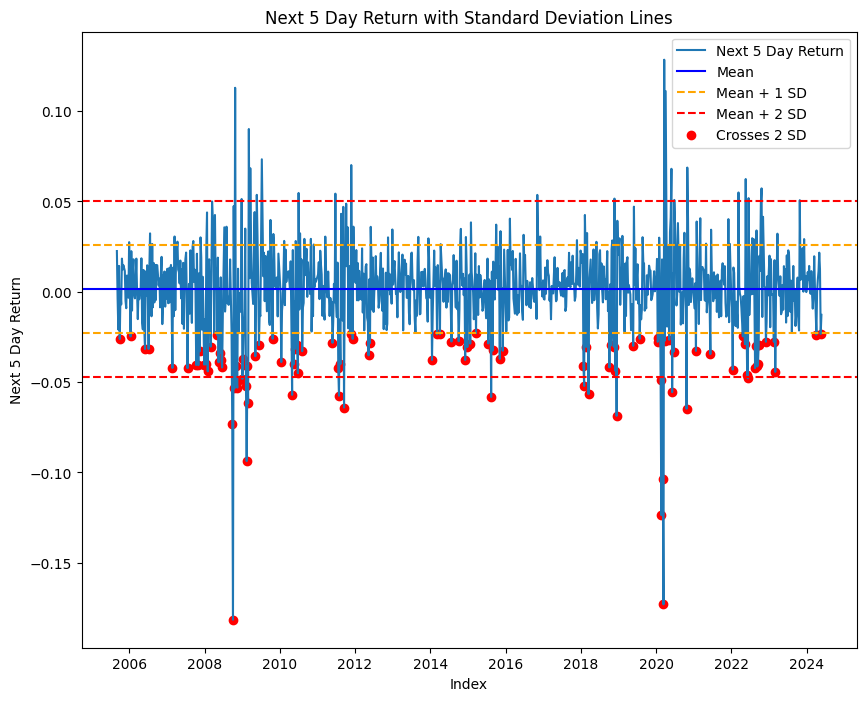

In [ ]:
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame and it contains 'Next_5_Day_Return' column

# Calculate mean and standard deviations
mean_return = final_df['Next_5_Day_Return'].mean()
std_return = final_df['Next_5_Day_Return'].std()

# Calculate the 1 and 2 standard deviation lines
one_std_plus = mean_return + std_return
one_std_minus = mean_return - std_return
two_std_plus = mean_return + 2 * std_return
two_std_minus = mean_return - 2 * std_return

# Find points that cross 1 standard deviations
cross_2sd = final_df[(final_df['Next_5_Day_Return'] < one_std_minus)]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(final_df['Next_5_Day_Return'], label='Next 5 Day Return')

# Plot the mean, 1SD, and 2SD lines
plt.axhline(y=mean_return, color='blue', linestyle='-', label='Mean')
plt.axhline(y=one_std_plus, color='orange', linestyle='--', label='Mean + 1 SD')
plt.axhline(y=one_std_minus, color='orange', linestyle='--')
plt.axhline(y=two_std_plus, color='red', linestyle='--', label='Mean + 2 SD')
plt.axhline(y=two_std_minus, color='red', linestyle='--')

# Mark points crossing 1SD
plt.scatter(cross_2sd.index, cross_2sd['Next_5_Day_Return'], color='red', label='Crosses 2 SD')

plt.title('Next 5 Day Return with Standard Deviation Lines')
plt.xlabel('Index')
plt.ylabel('Next 5 Day Return')
plt.legend()
plt.show()


In [ ]:
print(len(cross_2sd), ':', len(final_df))
print(mean_return - std_return)
print(mean_return + std_return)

102 : 942
-0.022607458655567812
0.026025748245417105


In [ ]:
#Categorise return data:
final_df['Regime'] = ""
final_dates = final_df.index

#Return greater than 2%
return_greater_than_2 = final_df[(final_df['Next_5_Day_Return'] > 0.02) == True].index
final_df.loc[return_greater_than_2,'Regime'] = "A"

#Return less than -5%
return_less_than_neg5 = final_df[(final_df['Next_5_Day_Return'] < -0.023) == True].index
final_df.loc[return_less_than_neg5,'Regime'] = "B"

#Others:
others_dates = set(final_dates) - set(return_greater_than_2) - set(return_less_than_neg5)
final_df.loc[list(others_dates),'Regime'] = "C"
final_df['year'] = final_df.index.year

In [ ]:
stat_df = final_df[['Regime','Next_5_Day_Return']].groupby('Regime').describe()
stat_df = stat_df.T.reset_index()[['level_1','A','B','C']].T
stat_df.columns = stat_df.iloc[0]
stat_df = stat_df.iloc[1:]
stat_df = stat_df[stat_df.columns[1:]]*100


In [ ]:
stat_df

level_1,mean,std,min,25%,50%,75%,max
Regime,,,,,,,
A,3.49889,1.74288,2.005546,2.333572,3.010889,4.008526,12.844484
B,-4.27145,2.521456,-18.151288,-4.436314,-3.771172,-2.922908,-2.315587
C,0.092878,1.079498,-2.289267,-0.648811,0.155785,0.992136,1.99818


In [ ]:
final_df.columns

Index(['Next_5_Day_Return', 'RSI3', 'RSI14', 'VIX_Close',
       'PCUSEQTR Index - Mid Price', 'Raven Sentiment Index', 'News Sentiment',
       'Adj Close', 'Volume', 'MT Historical Return', 'Return Difference',
       'ST_DMA_Indicator', 'MT_DMA_Indicator', 'LT_DMA_Indicator',
       'YieldChange_MT', 'YieldChange_ST', 'Coeffs_mean', 'Coeffs_std',
       'Varex_eig1', 'Varex_eig_top5', 'Varex_5-1', 'Pf_mean', 'Pf_std',
       'Above ST DMA', 'Above MT DMA', 'Regime', 'year'],
      dtype='object')

In [ ]:
#Training and Testing Data:
train = final_df[final_df['year'] < 2021]
test  = final_df[final_df['year'] >= 2021]

#X value columns
x_cols = list(final_df.columns[1:3])+list(final_df.columns[4:-2][:-4])+list(final_df.columns[-6:][3:])[:-2]
print(x_cols)

# x_cols = ['Coeffs_std',
#  'MT Historical Return',
#  'Varex_eig_top5',
#  'YieldChange_MT',
#  'Return Difference',
#  'Above MT DMA',
#  'LT_DMA_Indicator',
#  'RSI14','Volume',
#  'Coeffs_mean',
#  'RSI3',
#  'YieldChange_ST',
#  'ST_DMA_Indicator',
#   'VIX_Close','PCUSEQTR Index - Mid Price', 'Raven Sentiment Index', 'News Sentiment']

['RSI3', 'RSI14', 'PCUSEQTR Index - Mid Price', 'Raven Sentiment Index', 'News Sentiment', 'Adj Close', 'Volume', 'MT Historical Return', 'Return Difference', 'ST_DMA_Indicator', 'MT_DMA_Indicator', 'LT_DMA_Indicator', 'YieldChange_MT', 'YieldChange_ST', 'Coeffs_mean', 'Coeffs_std', 'Varex_eig1', 'Varex_eig_top5', 'Varex_5-1', 'Above MT DMA']


In [ ]:
final_df[(final_df['year'] >= 2018) & (final_df['year'] < 2022) ]

,Next_5_Day_Return,RSI3,RSI14,VIX_Close,PCUSEQTR Index - Mid Price,Raven Sentiment Index,News Sentiment,Adj Close,Volume,MT Historical Return,...,Coeffs_std,Varex_eig1,Varex_eig_top5,Varex_5-1,Pf_mean,Pf_std,Above ST DMA,Above MT DMA,Regime,year
2018-01-05,0.020055,96.42,87.99,9.220000,0.58,436.6902,0.245059,25295.869141,358020000.0,0.047842,...,0.249773,35.221222,83.671136,48.449914,-0.033910,0.185915,62.068966,68.965517,A,2018
2018-01-12,0.015944,98.07,89.82,10.160000,0.50,445.8489,0.290816,25803.189453,376390000.0,0.049532,...,0.237086,31.184959,80.897956,49.712997,-0.037499,0.185225,72.413793,68.965517,C,2018
2018-01-19,0.020904,98.59,90.64,11.270000,0.56,450.9267,0.229668,26071.720703,585000000.0,0.053201,...,0.243540,32.034208,83.965945,51.931737,-0.032213,0.186217,37.931034,48.275862,A,2018
2018-01-26,-0.041168,99.22,92.03,11.080000,0.49,461.9226,0.200083,26616.710938,477780000.0,0.074368,...,0.246976,30.379446,83.897839,53.518392,-0.095409,0.163130,75.862069,79.310345,B,2018
2018-02-02,-0.052116,42.13,69.60,17.309999,0.77,447.8703,0.226533,25520.960938,522880000.0,0.017780,...,0.214654,28.109609,81.843824,53.734215,-0.162429,0.096597,0.000000,0.000000,B,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,-0.009148,21.04,51.12,28.620001,0.56,874.7093,0.083347,34899.339844,324580000.0,-0.023261,...,0.226289,38.952207,82.452515,43.500308,-0.074703,0.166592,3.333333,3.333333,C,2021
2021-12-03,0.040223,15.89,48.20,30.670000,0.74,875.3105,0.030290,34580.078125,439550000.0,-0.042746,...,0.242714,37.256439,87.125689,49.869250,-0.128998,0.129201,60.000000,60.000000,A,2021
2021-12-10,-0.016834,67.65,59.14,18.690001,0.61,901.7500,0.000061,35970.988281,361200000.0,0.001385,...,0.226406,32.017746,87.798948,55.781202,-0.135666,0.122181,60.000000,73.333333,C,2021
2021-12-17,0.026493,48.26,53.81,21.570000,0.59,910.4373,-0.042072,35365.441406,750480000.0,-0.014092,...,0.241187,37.870792,89.603819,51.733027,-0.107466,0.147595,13.333333,20.000000,A,2021


In [ ]:
def plot_feature_importance(feature_importance,name):
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Sort the features by importance
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.xlabel('Relative Importance')

    title = 'Feature Importance - '+str(name)

    plt.title('Feature Importance')
    plt.show()




In [ ]:
# Function to calculate performance metrics
def calculate_performance_metrics(returns, days_per_year=252):
    annualized_return = np.mean(returns) * 52
    volatility = returns.std() * np.sqrt(52)
    sharpe_ratio = annualized_return / volatility
    return annualized_return, volatility, sharpe_ratio

Classifier: Logistic Regression
Accuracy: 74.26900584795322%
Classification Report:
              precision    recall  f1-score   support

           A       0.31      0.39      0.35        23
           B       0.00      0.00      0.00        17
           C       0.83      0.90      0.86       131

    accuracy                           0.74       171
   macro avg       0.38      0.43      0.40       171
weighted avg       0.68      0.74      0.71       171

    A  B    C
A   9  0   14
B   7  0   10
C  13  0  118
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.20%, Volatility: 13.87%, Sharpe Ratio: 0.59


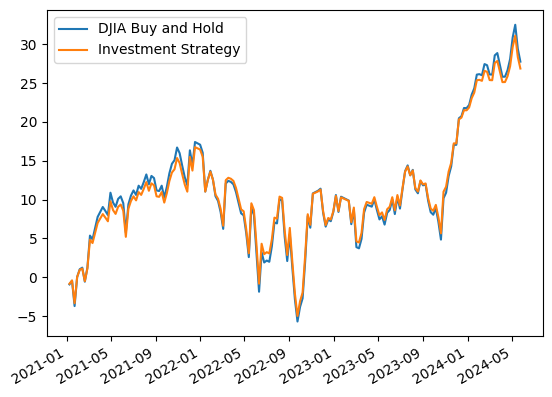



Classifier: Decision Tree
Accuracy: 60.81871345029239%
Classification Report:
              precision    recall  f1-score   support

           A       0.22      0.30      0.25        23
           B       0.21      0.35      0.26        17
           C       0.83      0.69      0.76       131

    accuracy                           0.61       171
   macro avg       0.42      0.45      0.42       171
weighted avg       0.68      0.61      0.64       171

    A   B   C
A   7   5  11
B   3   6   8
C  22  18  91


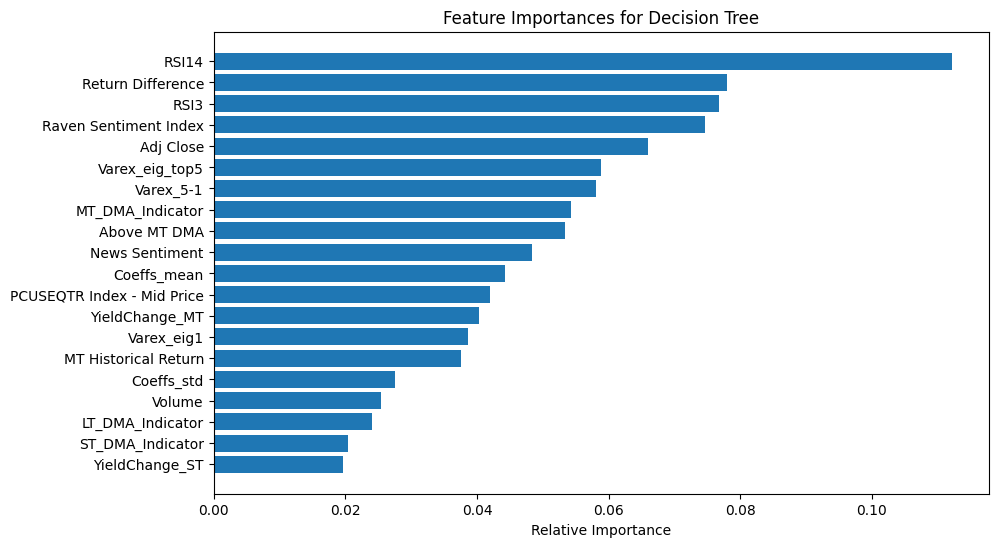

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 10.72%, Volatility: 11.98%, Sharpe Ratio: 0.89


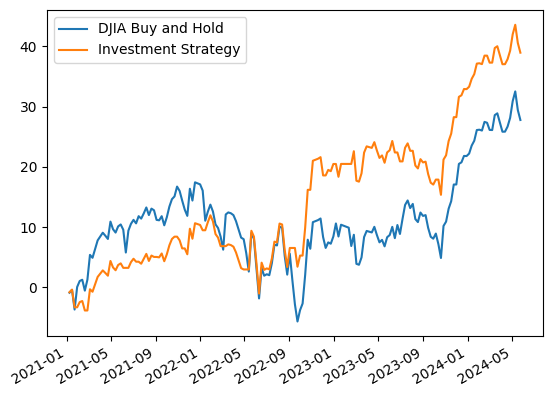



Classifier: Random Forest
Accuracy: 73.68421052631578%
Classification Report:
              precision    recall  f1-score   support

           A       0.28      0.22      0.24        23
           B       0.29      0.12      0.17        17
           C       0.82      0.91      0.86       131

    accuracy                           0.74       171
   macro avg       0.46      0.41      0.42       171
weighted avg       0.69      0.74      0.71       171

   A  B    C
A  5  1   17
B  5  2   10
C  8  4  119


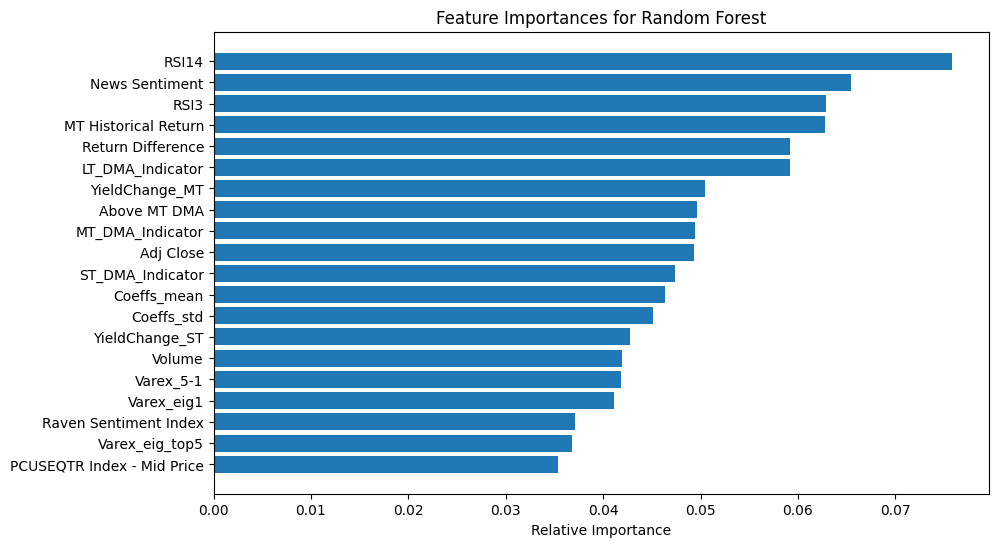

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.27%, Volatility: 12.99%, Sharpe Ratio: 0.64


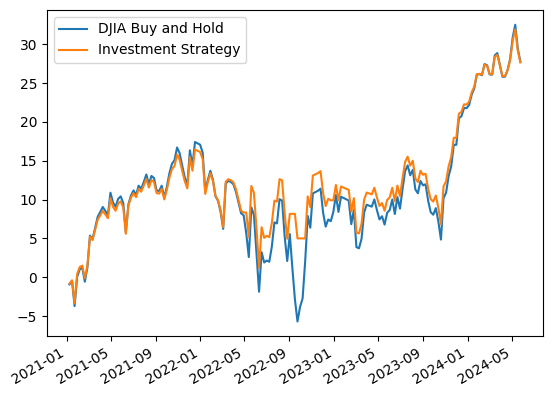



Classifier: K-Nearest Neighbors
Accuracy: 60.23391812865497%
Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.24        23
           B       0.09      0.12      0.10        17
           C       0.77      0.73      0.75       131

    accuracy                           0.60       171
   macro avg       0.36      0.37      0.37       171
weighted avg       0.63      0.60      0.62       171

    A   B   C
A   6   1  16
B   3   2  12
C  17  19  95
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 10.48%, Volatility: 13.02%, Sharpe Ratio: 0.81


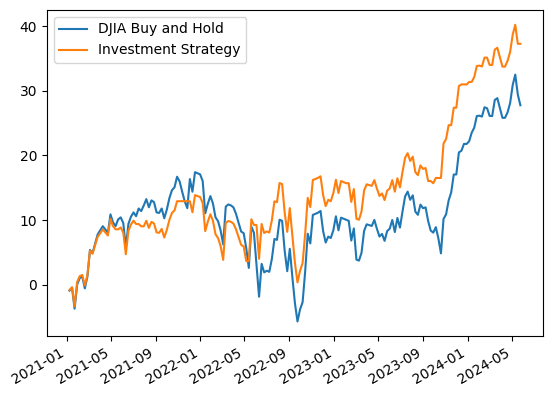



Classifier: Gradient Boosting
Accuracy: 49.707602339181285%
Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.13      0.17        23
           B       0.16      0.71      0.26        17
           C       0.85      0.53      0.66       131

    accuracy                           0.50       171
   macro avg       0.41      0.46      0.36       171
weighted avg       0.70      0.50      0.55       171

   A   B   C
A  3  11   9
B  2  12   3
C  8  53  70


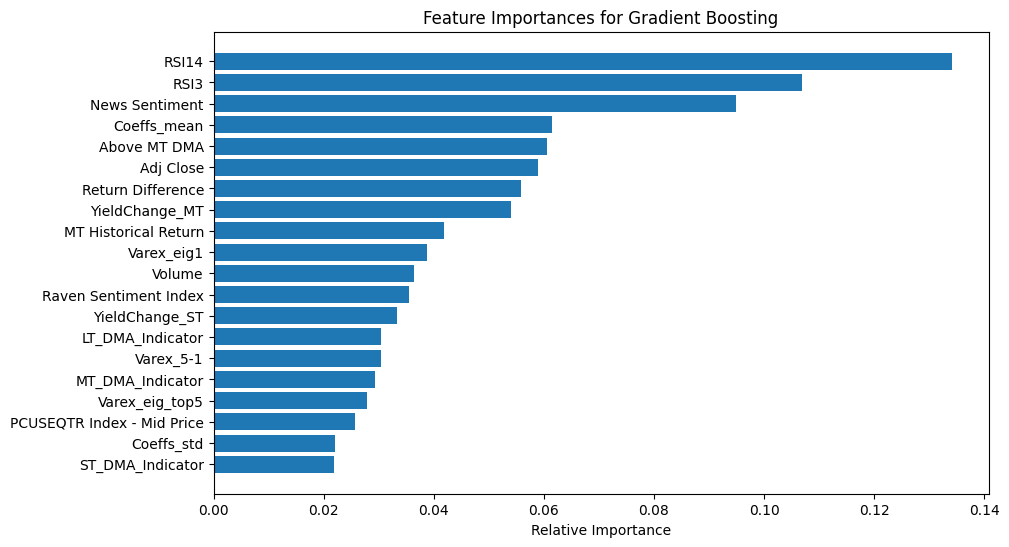

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 7.49%, Volatility: 9.17%, Sharpe Ratio: 0.82


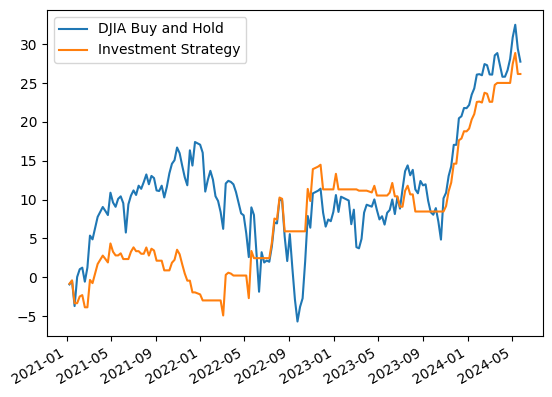

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier



#Training data:
X_train = pd.DataFrame(train[x_cols])
y_train = pd.Series(train.Regime)

#Test data:
X_test = pd.DataFrame(test[x_cols])
y_test = pd.Series(test.Regime)


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

models = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Naive Bayes"]

# Create pipelines and evaluate
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_model = pd.DataFrame(confusion_matrix(y_test, y_pred))
    confusion_matrix_model.index = ['A','B','C']
    confusion_matrix_model.columns = ['A','B','C']

    if not name in models:
        results[name] = {
            'accuracy': str(accuracy*100)+"%",
            'classification_report': classification_report(y_test, y_pred),
            'feature_importance':clf.feature_importances_,
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred
        }

    else:
        results[name] = {
            'accuracy': str(accuracy*100)+"%",
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred
        }


#plot Returns:
def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 0.9
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 0.9
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    annualized_return, volatility, sharpe_ratio = calculate_performance_metrics(return_df['Next_5_Day_Return'])
    predicted_annualized_return, predicted_volatility, predicted_sharpe_ratio = calculate_performance_metrics(return_df['Predicted Portfolio_Return'])

    print(f"DJIA - Annualized Return: {annualized_return:.2%}, Volatility: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Investment Strategy - Annualized Return: {predicted_annualized_return:.2%}, Volatility: {predicted_volatility:.2%}, Sharpe Ratio: {predicted_sharpe_ratio:.2f}")

    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print(result['confusion_matrix'])
    if not name in models:
        plot_feature_importance(result['feature_importance'],name)
    plot_returns(final_df,X_test,y_test,result['predicted_y'])
    print("\n" + "="*80 + "\n")


In the context of machine learning, an imbalanced dataset refers to a situation where the classes in the target variable are not represented equally. For example, if you are classifying whether a financial transaction is fraudulent, there may be many more legitimate transactions than fraudulent ones. This imbalance can lead to several issues:

**Model Bias:** The model may become biased towards the majority class and perform poorly on the minority class.
Misleading Accuracy: High accuracy metrics might be misleading if the model is simply predicting the majority class most of the time.

#### Hyperparameter Tuning

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classifier: Logistic Regression
Accuracy: 45.02923976608187%
Classification Report:
              precision    recall  f1-score   support

           A       0.19      0.61      0.29        23
           B       0.08      0.12      0.10        17
           C       0.85      0.47      0.60       131

    accuracy                           0.45       171
   macro avg       0.37      0.40      0.33       171
weighted avg       0.68      0.45      0.51       171

    A   B   C
A  14   2   7
B  11   2   4
C  50  20  61
Best Parameters: {'classifier__C': 0.01}


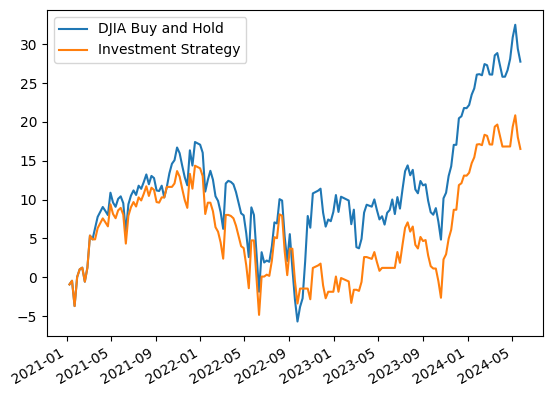



Classifier: Decision Tree
Accuracy: 66.66666666666666%
Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.39      0.32        23
           B       0.17      0.18      0.17        17
           C       0.86      0.78      0.82       131

    accuracy                           0.67       171
   macro avg       0.43      0.45      0.43       171
weighted avg       0.71      0.67      0.68       171

    A   B    C
A   9   4   10
B   7   3    7
C  18  11  102
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}


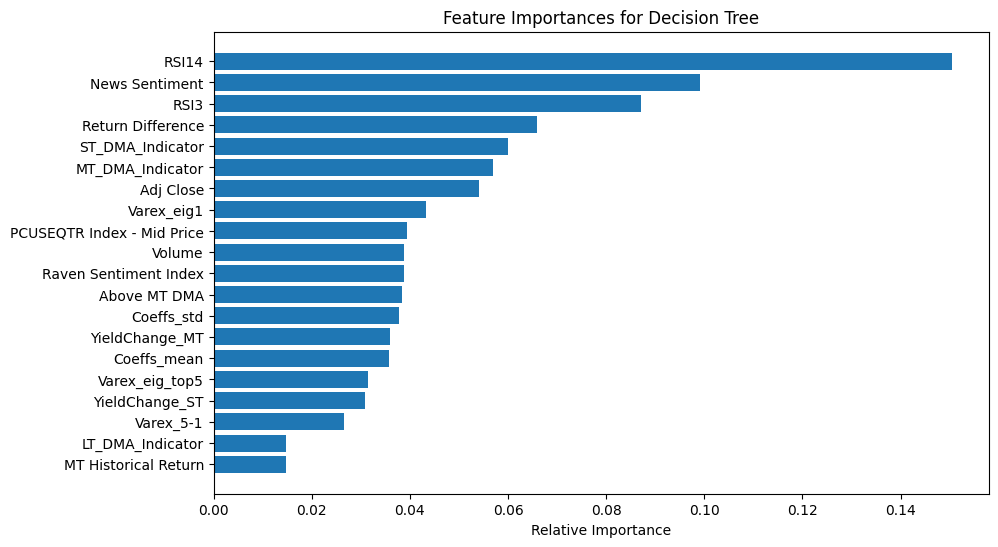

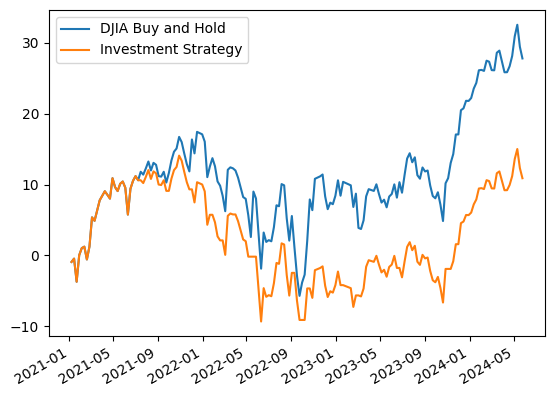



Classifier: Random Forest
Accuracy: 76.60818713450293%
Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.13      0.21        23
           B       0.33      0.06      0.10        17
           C       0.78      0.97      0.87       131

    accuracy                           0.77       171
   macro avg       0.54      0.39      0.39       171
weighted avg       0.70      0.77      0.70       171

   A  B    C
A  3  0   20
B  1  1   15
C  2  2  127
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


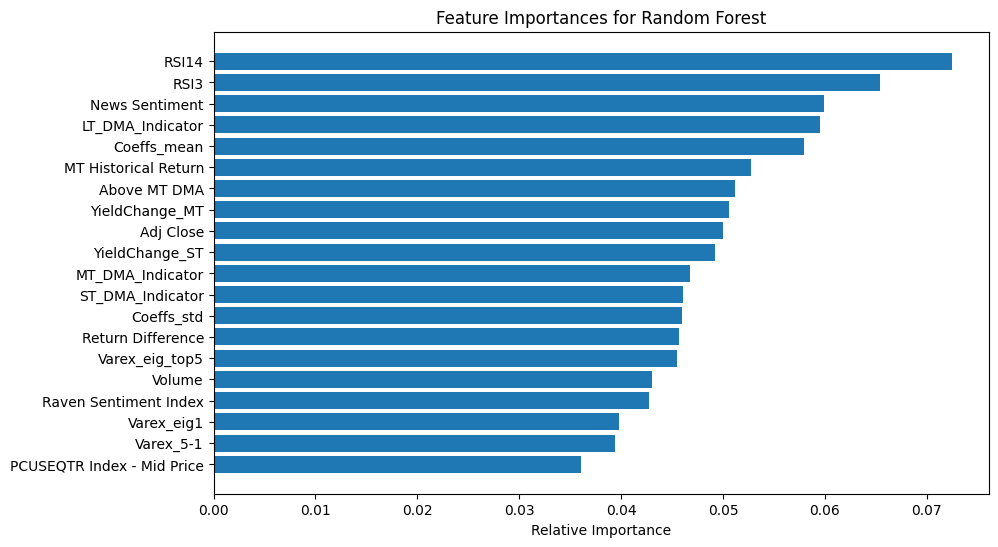

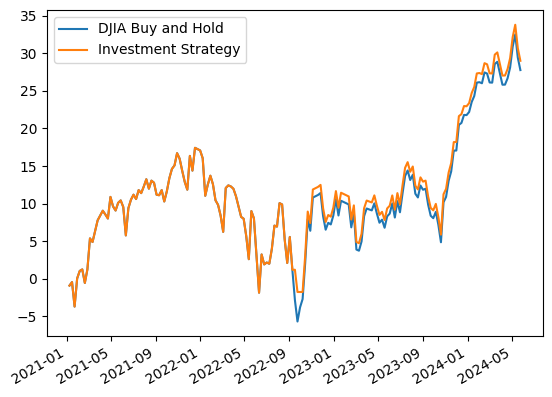



Classifier: K-Nearest Neighbors
Accuracy: 76.0233918128655%
Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.04      0.07        23
           B       0.00      0.00      0.00        17
           C       0.77      0.98      0.87       131

    accuracy                           0.76       171
   macro avg       0.34      0.34      0.31       171
weighted avg       0.63      0.76      0.67       171

   A  B    C
A  1  0   22
B  1  0   16
C  2  0  129
Best Parameters: {'classifier__n_neighbors': 17, 'classifier__weights': 'uniform'}


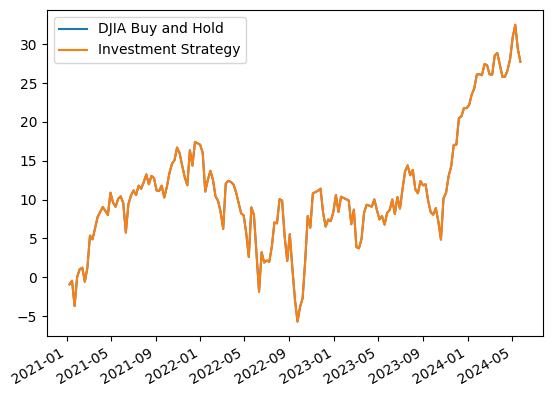



Classifier: Gradient Boosting
Accuracy: 76.0233918128655%
Classification Report:
              precision    recall  f1-score   support

           A       0.29      0.09      0.13        23
           B       0.33      0.06      0.10        17
           C       0.79      0.97      0.87       131

    accuracy                           0.76       171
   macro avg       0.47      0.37      0.37       171
weighted avg       0.68      0.76      0.69       171

   A  B    C
A  2  0   21
B  3  1   13
C  2  2  127
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


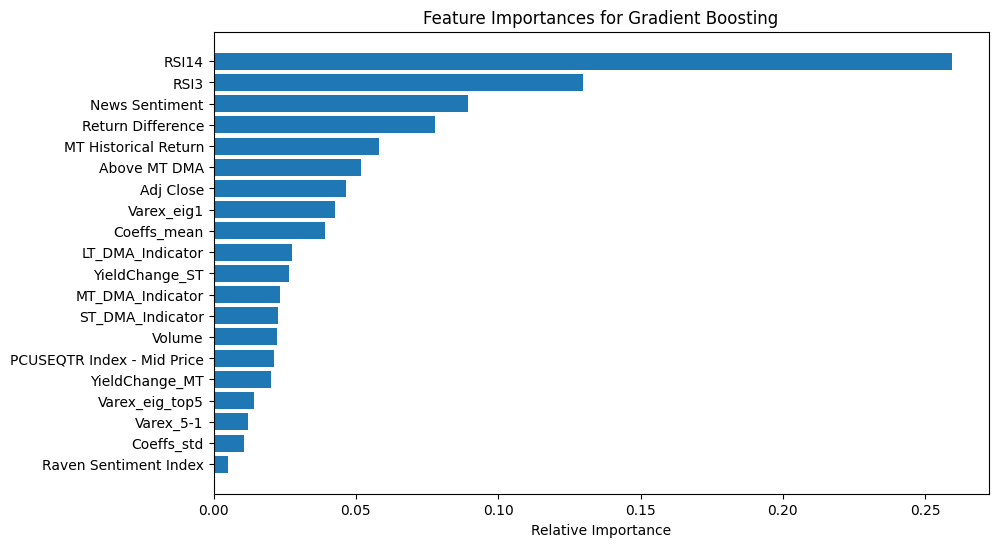

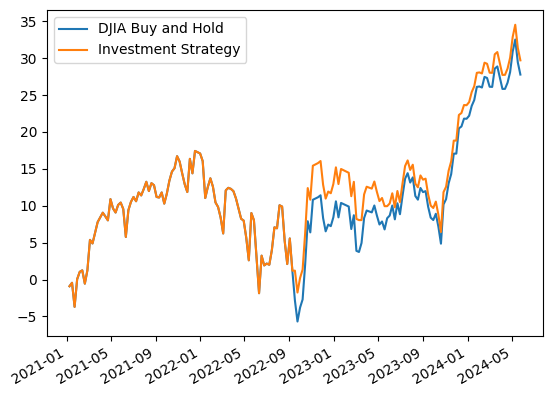

In [ ]:
from sklearn.model_selection import GridSearchCV

# Training data:
X_train = pd.DataFrame(train[x_cols])
y_train = pd.Series(train.Regime)

# Test data:
X_test = pd.DataFrame(test[x_cols])
y_test = pd.Series(test.Regime)

# Define parameter grids for classifiers
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100]
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30, 40],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9,17],
        'classifier__weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7]
    }
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

models_without_importance = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Naive Bayes"]

# Create pipelines and perform hyperparameter tuning
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    if name in param_grids:
        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
        y_pred = best_pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        confusion_matrix_model = pd.DataFrame(confusion_matrix(y_test, y_pred))
        confusion_matrix_model.index = ['A','B','C']
        confusion_matrix_model.columns = ['A','B','C']

        if name not in models_without_importance and hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
            results[name] = {
                'accuracy': str(accuracy * 100) + "%",
                'classification_report': classification_report(y_test, y_pred),
                'feature_importance': best_pipeline.named_steps['classifier'].feature_importances_,
                'best_params': grid_search.best_params_,
                'confusion_matrix':confusion_matrix_model,
                'predicted_y':y_pred
            }
        else:
            results[name] = {
                'accuracy': str(accuracy * 100) + "%",
                'classification_report': classification_report(y_test, y_pred),
                'best_params': grid_search.best_params_,
                'confusion_matrix':confusion_matrix_model,
                'predicted_y':y_pred
            }
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if name not in models_without_importance and hasattr(clf, 'feature_importances_'):
            results[name] = {
                'accuracy': str(accuracy * 100) + "%",
                'classification_report': classification_report(y_test, y_pred),
                'feature_importance': clf.feature_importances_,
                'confusion_matrix':confusion_matrix_model,
                'predicted_y':y_pred
            }
        else:
            results[name] = {
                'accuracy': str(accuracy * 100) + "%",
                'classification_report': classification_report(y_test, y_pred),
                'confusion_matrix':confusion_matrix_model,
                'predicted_y':y_pred
            }

# Plot feature importances
def plot_feature_importance(importances, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [x_cols[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 0.9
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 0.9
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    annualized_return, volatility, sharpe_ratio = calculate_performance_metrics(return_df['Next_5_Day_Return'])
    predicted_annualized_return, predicted_volatility, predicted_sharpe_ratio = calculate_performance_metrics(return_df['Predicted Portfolio_Return'])

    print(f"DJIA - Annualized Return: {annualized_return:.2%}, Volatility: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Investment Strategy - Annualized Return: {predicted_annualized_return:.2%}, Volatility: {predicted_volatility:.2%}, Sharpe Ratio: {predicted_sharpe_ratio:.2f}")


    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

#plot Returns:
def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 1
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 1
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print(result['confusion_matrix'])
    if 'best_params' in result:
        print(f"Best Parameters: {result['best_params']}")
    if 'feature_importance' in result:
        plot_feature_importance(result['feature_importance'], name)
    plot_returns(final_df,X_test,y_test,result['predicted_y'])
    print("\n" + "="*80 + "\n")


#### Using Class Weights

Classifier: Logistic Regression
Accuracy: 32.748538011695906%
Classification Report:
              precision    recall  f1-score   support

           A       0.14      0.78      0.24        23
           B       0.00      0.00      0.00        17
           C       0.86      0.29      0.43       131

    accuracy                           0.33       171
   macro avg       0.34      0.36      0.22       171
weighted avg       0.68      0.33      0.36       171

    A  B   C
A  18  0   5
B  16  0   1
C  93  0  38
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.32%, Volatility: 14.53%, Sharpe Ratio: 0.57


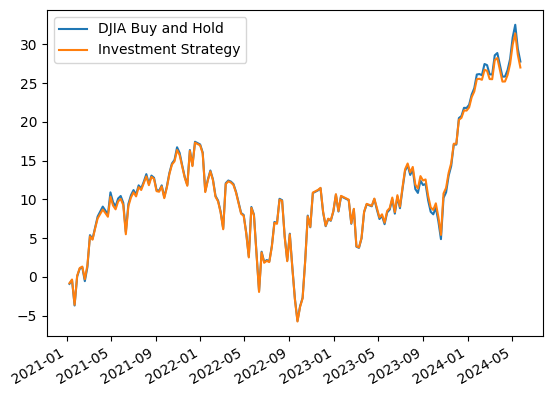



Classifier: Decision Tree
Accuracy: 70.76023391812866%
Classification Report:
              precision    recall  f1-score   support

           A       0.36      0.22      0.27        23
           B       0.17      0.18      0.17        17
           C       0.81      0.86      0.84       131

    accuracy                           0.71       171
   macro avg       0.45      0.42      0.43       171
weighted avg       0.69      0.71      0.69       171

   A   B    C
A  5   4   14
B  2   3   12
C  7  11  113


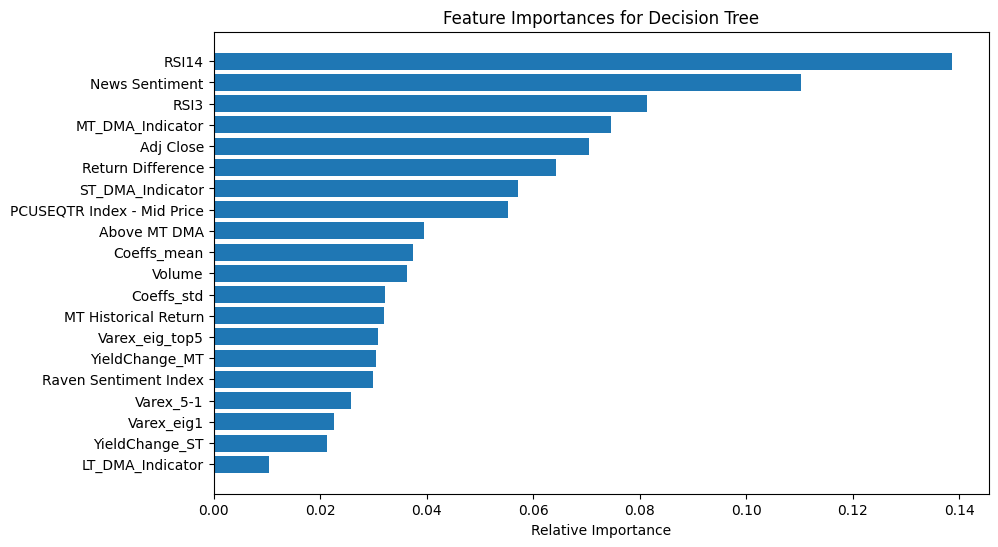

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 3.55%, Volatility: 11.89%, Sharpe Ratio: 0.30


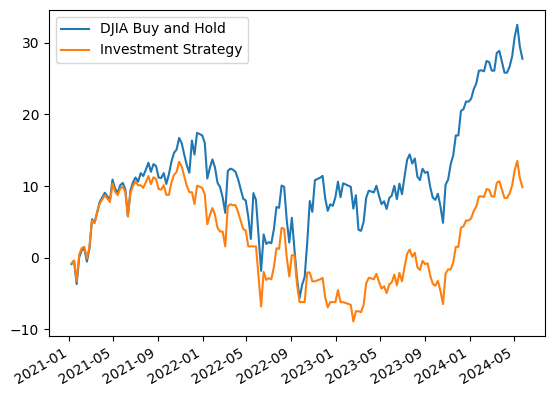



Classifier: Random Forest
Accuracy: 74.85380116959064%
Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.09      0.15        23
           B       0.00      0.00      0.00        17
           C       0.77      0.96      0.85       131

    accuracy                           0.75       171
   macro avg       0.42      0.35      0.33       171
weighted avg       0.66      0.75      0.67       171

   A  B    C
A  2  0   21
B  0  0   17
C  2  3  126


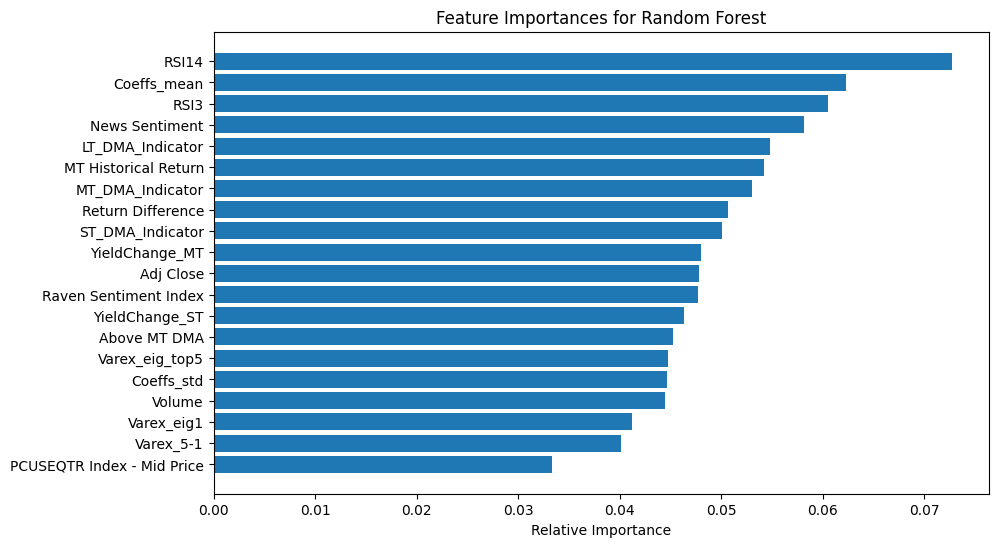

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 7.71%, Volatility: 13.24%, Sharpe Ratio: 0.58


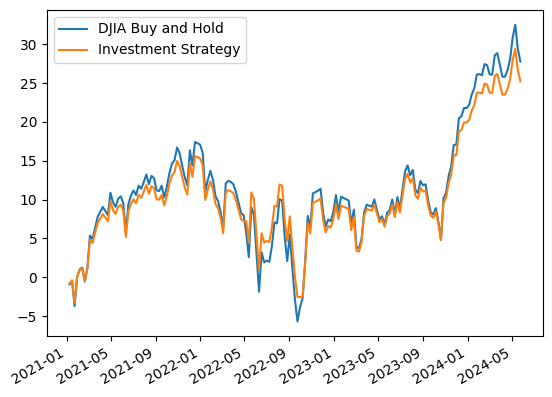



Classifier: K-Nearest Neighbors
Accuracy: 60.23391812865497%
Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.24        23
           B       0.09      0.12      0.10        17
           C       0.77      0.73      0.75       131

    accuracy                           0.60       171
   macro avg       0.36      0.37      0.37       171
weighted avg       0.63      0.60      0.62       171

    A   B   C
A   6   1  16
B   3   2  12
C  17  19  95
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 10.48%, Volatility: 13.02%, Sharpe Ratio: 0.81


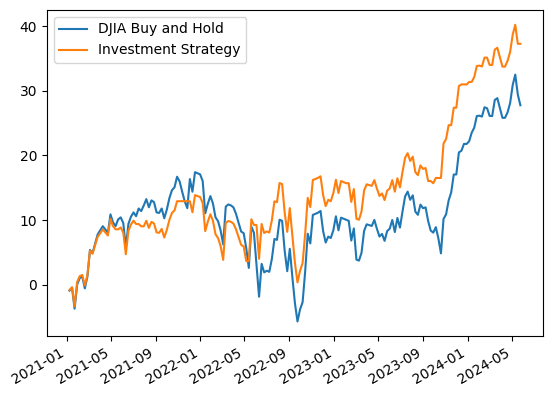

In [ ]:
# Training data:
X_train = pd.DataFrame(train[x_cols])
y_train = pd.Series(train.Regime)

# Test data:
X_test = pd.DataFrame(test[x_cols])
y_test = pd.Series(test.Regime)

# Define classifiers with class weights
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

models_without_importance = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Naive Bayes"]

# Create pipelines and evaluate
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_model = pd.DataFrame(confusion_matrix(y_test, y_pred))
    confusion_matrix_model.index = ['A','B','C']
    confusion_matrix_model.columns = ['A','B','C']

    if name not in models_without_importance and hasattr(clf, 'feature_importances_'):
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred),
            'feature_importance': clf.feature_importances_,
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred
        }
    else:
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred
        }

# Plot feature importances
def plot_feature_importance(importances, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [x_cols[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


#plot Returns:
def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 0.9
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 0.9
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    annualized_return, volatility, sharpe_ratio = calculate_performance_metrics(return_df['Next_5_Day_Return'])
    predicted_annualized_return, predicted_volatility, predicted_sharpe_ratio = calculate_performance_metrics(return_df['Predicted Portfolio_Return'])

    print(f"DJIA - Annualized Return: {annualized_return:.2%}, Volatility: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Investment Strategy - Annualized Return: {predicted_annualized_return:.2%}, Volatility: {predicted_volatility:.2%}, Sharpe Ratio: {predicted_sharpe_ratio:.2f}")


    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report']),
    print(result['confusion_matrix'])
    if 'feature_importance' in result:
        plot_feature_importance(result['feature_importance'], name)

    plot_returns(final_df,X_test,y_test,result['predicted_y'])
    print("\n" + "="*80 + "\n")


#### Ensemble Methods

Classifier: Logistic Regression
Accuracy: 32.748538011695906%
Classification Report:
              precision    recall  f1-score   support

           A       0.14      0.78      0.24        23
           B       0.00      0.00      0.00        17
           C       0.86      0.29      0.43       131

    accuracy                           0.33       171
   macro avg       0.34      0.36      0.22       171
weighted avg       0.68      0.33      0.36       171

    A  B   C
A  18  0   5
B  16  0   1
C  93  0  38
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.32%, Volatility: 14.53%, Sharpe Ratio: 0.57


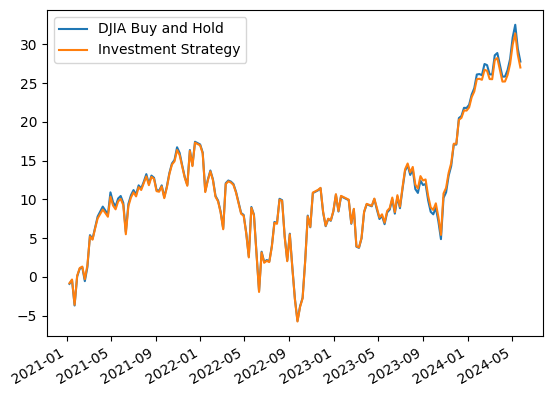



Classifier: Decision Tree
Accuracy: 66.66666666666666%
Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.39      0.32        23
           B       0.17      0.18      0.17        17
           C       0.86      0.78      0.82       131

    accuracy                           0.67       171
   macro avg       0.43      0.45      0.43       171
weighted avg       0.71      0.67      0.68       171

    A   B    C
A   9   4   10
B   7   3    7
C  18  11  102


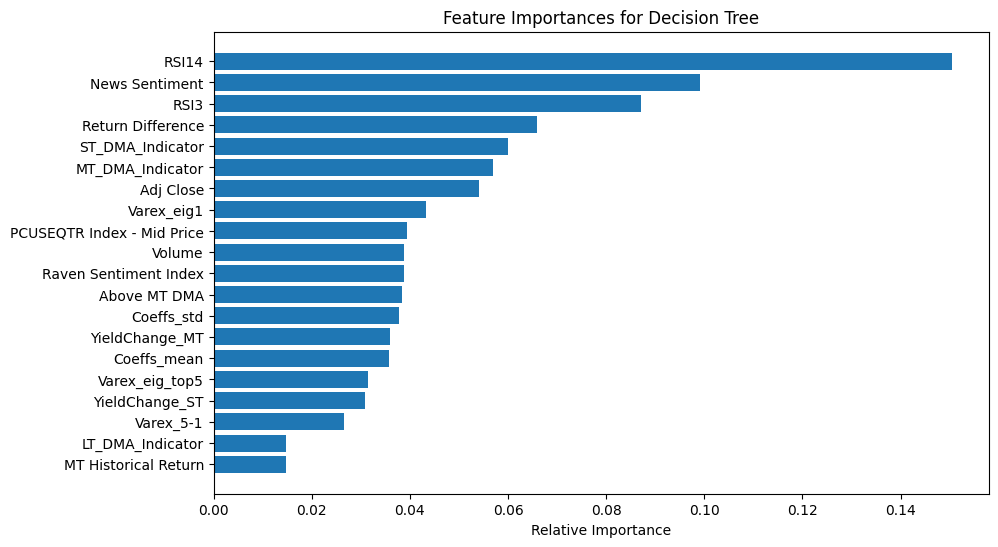

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 3.76%, Volatility: 12.33%, Sharpe Ratio: 0.30


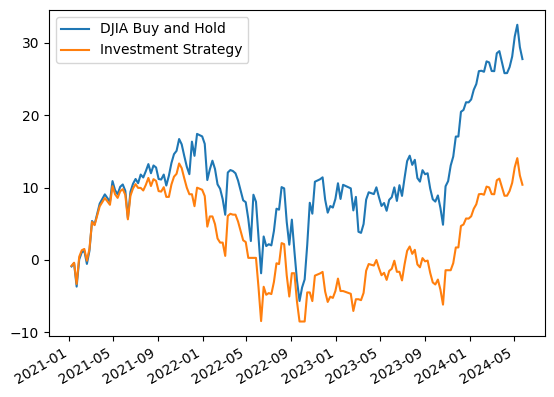



Classifier: Random Forest
Accuracy: 75.43859649122807%
Classification Report:
              precision    recall  f1-score   support

           A       0.33      0.09      0.14        23
           B       0.00      0.00      0.00        17
           C       0.77      0.97      0.86       131

    accuracy                           0.75       171
   macro avg       0.37      0.35      0.33       171
weighted avg       0.64      0.75      0.68       171

   A  B    C
A  2  0   21
B  1  0   16
C  3  1  127


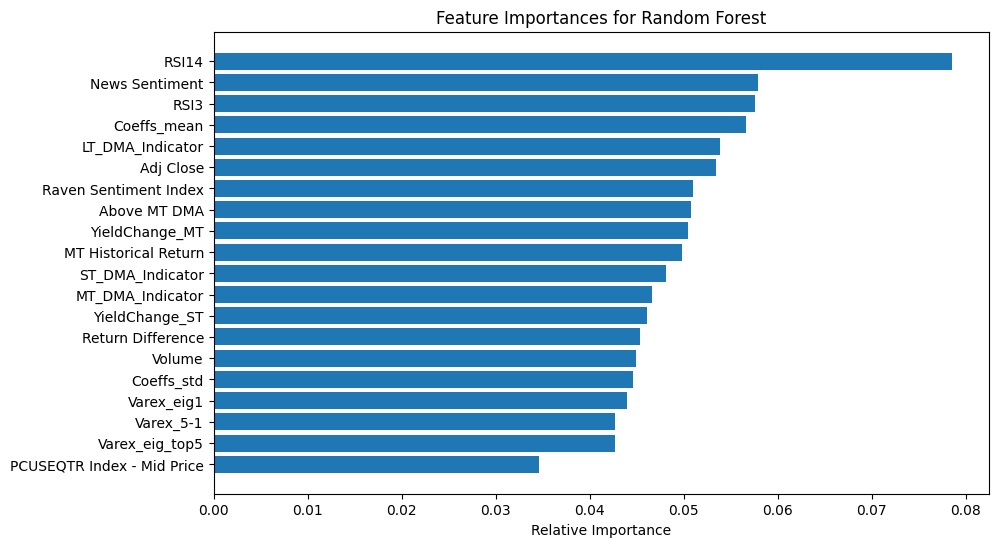

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 7.33%, Volatility: 13.39%, Sharpe Ratio: 0.55


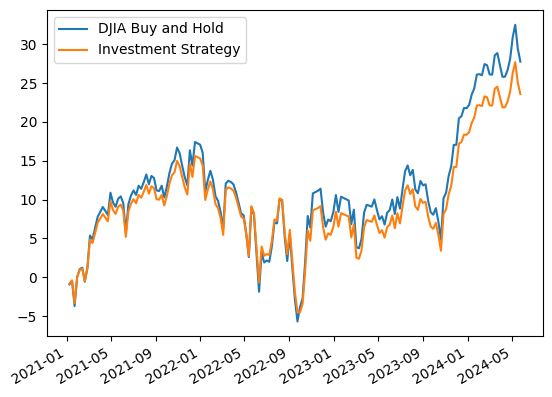



Classifier: Gradient Boosting
Accuracy: 49.122807017543856%
Classification Report:
              precision    recall  f1-score   support

           A       0.27      0.17      0.21        23
           B       0.16      0.71      0.26        17
           C       0.85      0.52      0.64       131

    accuracy                           0.49       171
   macro avg       0.42      0.47      0.37       171
weighted avg       0.70      0.49      0.55       171

   A   B   C
A  4  10   9
B  2  12   3
C  9  54  68


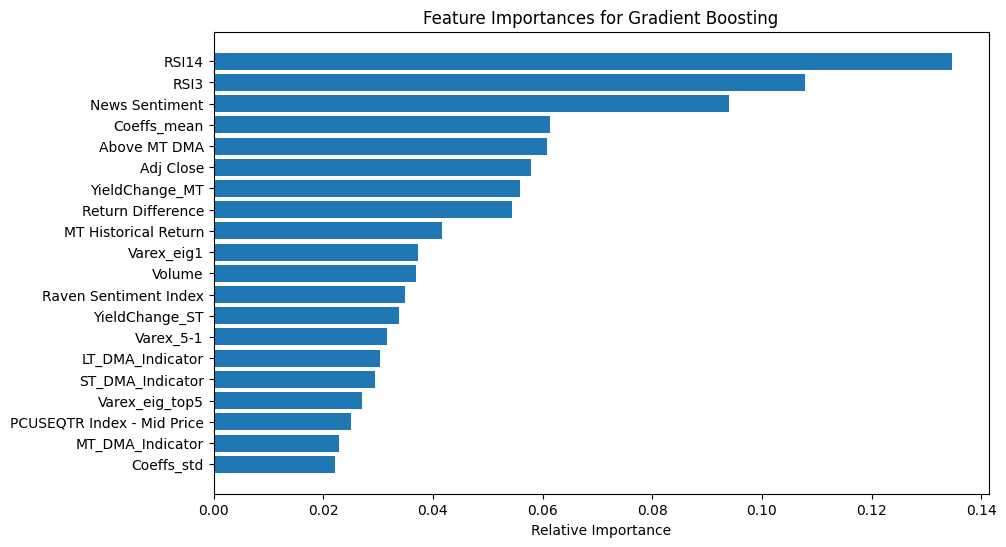

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.72%, Volatility: 9.31%, Sharpe Ratio: 0.94


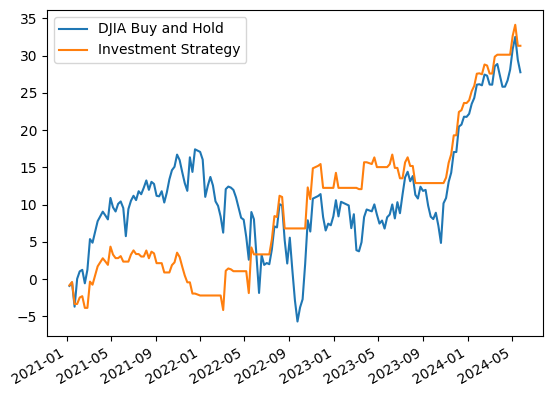



Classifier: Voting Classifier
Accuracy: 61.98830409356725%
Classification Report:
              precision    recall  f1-score   support

           A       0.30      0.43      0.36        23
           B       0.15      0.24      0.18        17
           C       0.83      0.70      0.76       131

    accuracy                           0.62       171
   macro avg       0.43      0.46      0.43       171
weighted avg       0.69      0.62      0.65       171

    A   B   C
A  10   2  11
B   5   4   8
C  18  21  92
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.09%, Volatility: 12.58%, Sharpe Ratio: 0.64


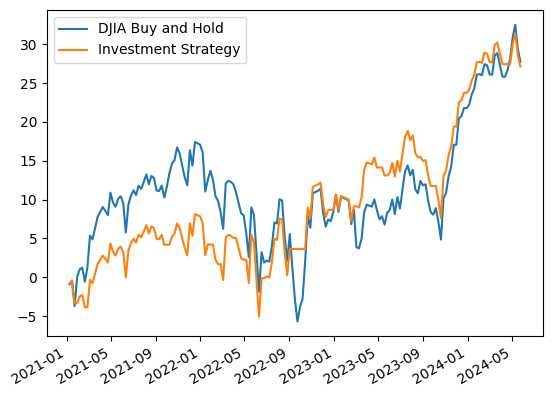

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Training data:
X_train = pd.DataFrame(train[x_cols])
y_train = pd.Series(train.Regime)

# Test data:
X_test = pd.DataFrame(test[x_cols])
y_test = pd.Series(test.Regime)

# Define individual classifiers with class weights
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

}

# Define the ensemble classifier using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('gb', GradientBoostingClassifier())
], voting='soft')

# Add the ensemble classifier to the classifiers dictionary
classifiers['Voting Classifier'] = voting_clf

models_without_importance = ["Logistic Regression", "Support Vector Machine", "Naive Bayes"]

# Create pipelines and evaluate
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_model = pd.DataFrame(confusion_matrix(y_test, y_pred))
    confusion_matrix_model.index = ['A','B','C']
    confusion_matrix_model.columns = ['A','B','C']


    if name not in models_without_importance and hasattr(clf, 'feature_importances_'):
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred),
            'feature_importance': clf.feature_importances_,
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred

        }
    else:
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred
        }

# Plot feature importances
def plot_feature_importance(importances, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [x_cols[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

#plot Returns:
def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 0.9
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 0.9
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    annualized_return, volatility, sharpe_ratio = calculate_performance_metrics(return_df['Next_5_Day_Return'])
    predicted_annualized_return, predicted_volatility, predicted_sharpe_ratio = calculate_performance_metrics(return_df['Predicted Portfolio_Return'])

    print(f"DJIA - Annualized Return: {annualized_return:.2%}, Volatility: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Investment Strategy - Annualized Return: {predicted_annualized_return:.2%}, Volatility: {predicted_volatility:.2%}, Sharpe Ratio: {predicted_sharpe_ratio:.2f}")


    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print(result['confusion_matrix'])
    if 'feature_importance' in result:
        plot_feature_importance(result['feature_importance'], name)
    plot_returns(final_df,X_test,y_test,result['predicted_y'])
    print("\n" + "="*80 + "\n")


#### Advanced Models

In [ ]:
!pip install catboost

Classifier: Logistic Regression
Accuracy: 32.748538011695906%
Classification Report:
              precision    recall  f1-score   support

           A       0.14      0.78      0.24        23
           B       0.00      0.00      0.00        17
           C       0.86      0.29      0.43       131

    accuracy                           0.33       171
   macro avg       0.34      0.36      0.22       171
weighted avg       0.68      0.33      0.36       171

    A  B   C
A  18  0   5
B  16  0   1
C  93  0  38
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.32%, Volatility: 14.53%, Sharpe Ratio: 0.57


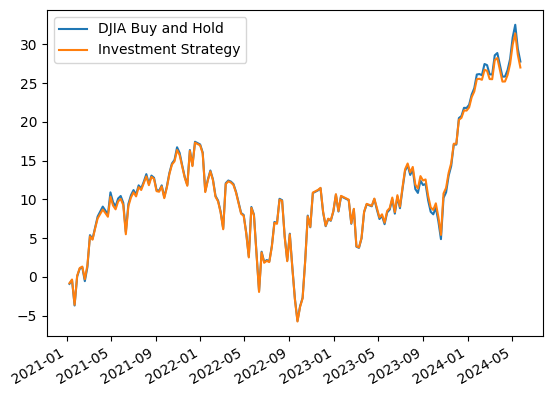



Classifier: Decision Tree
Accuracy: 66.66666666666666%
Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.39      0.32        23
           B       0.17      0.18      0.17        17
           C       0.86      0.78      0.82       131

    accuracy                           0.67       171
   macro avg       0.43      0.45      0.43       171
weighted avg       0.71      0.67      0.68       171

    A   B    C
A   9   4   10
B   7   3    7
C  18  11  102


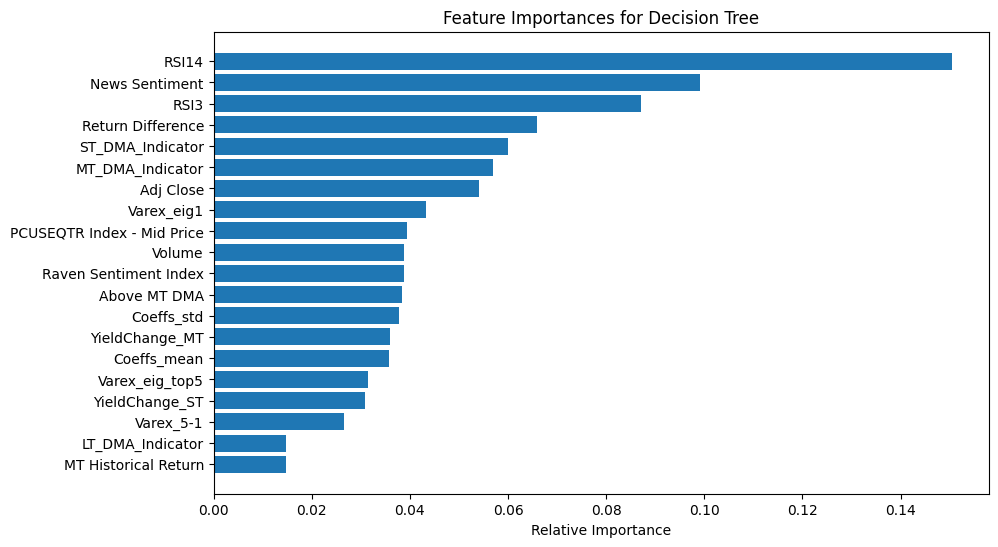

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 3.76%, Volatility: 12.33%, Sharpe Ratio: 0.30


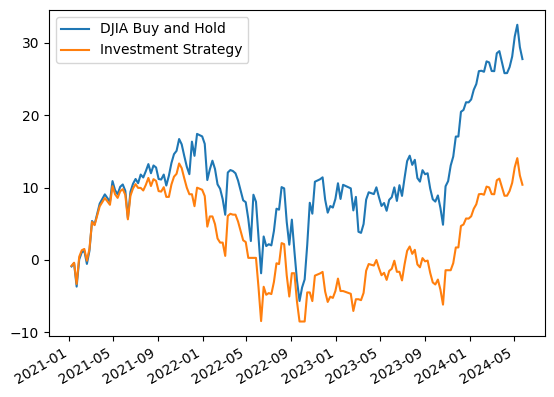



Classifier: Random Forest
Accuracy: 75.43859649122807%
Classification Report:
              precision    recall  f1-score   support

           A       0.33      0.09      0.14        23
           B       0.00      0.00      0.00        17
           C       0.78      0.97      0.86       131

    accuracy                           0.75       171
   macro avg       0.37      0.35      0.33       171
weighted avg       0.64      0.75      0.68       171

   A  B    C
A  2  0   21
B  2  0   15
C  2  2  127


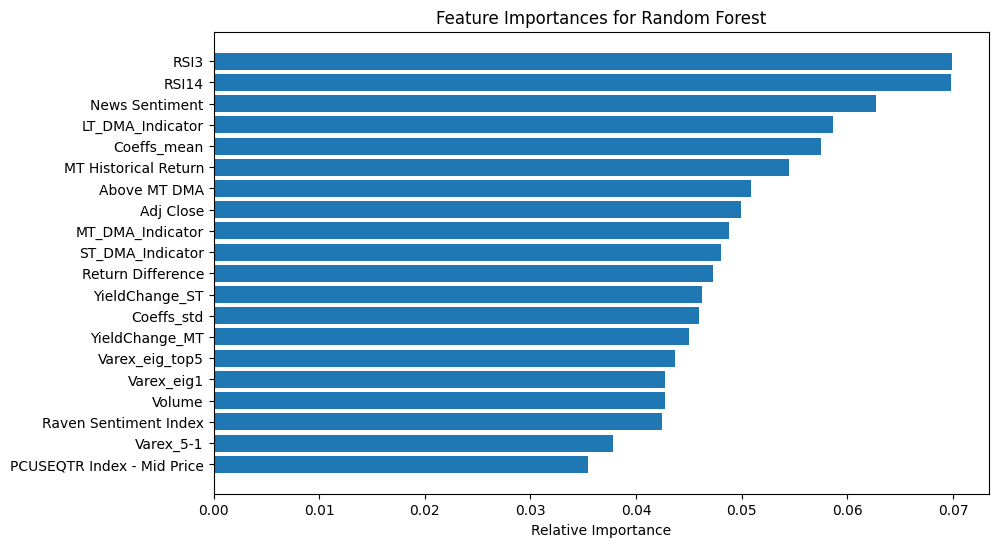

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 6.92%, Volatility: 13.39%, Sharpe Ratio: 0.52


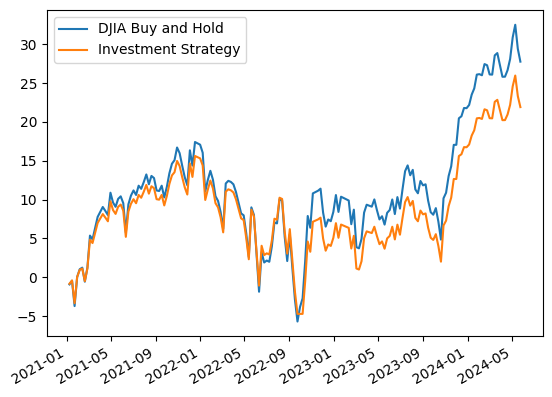



Classifier: K-Nearest Neighbors
Accuracy: 60.23391812865497%
Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.24        23
           B       0.09      0.12      0.10        17
           C       0.77      0.73      0.75       131

    accuracy                           0.60       171
   macro avg       0.36      0.37      0.37       171
weighted avg       0.63      0.60      0.62       171

    A   B   C
A   6   1  16
B   3   2  12
C  17  19  95
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 10.48%, Volatility: 13.02%, Sharpe Ratio: 0.81


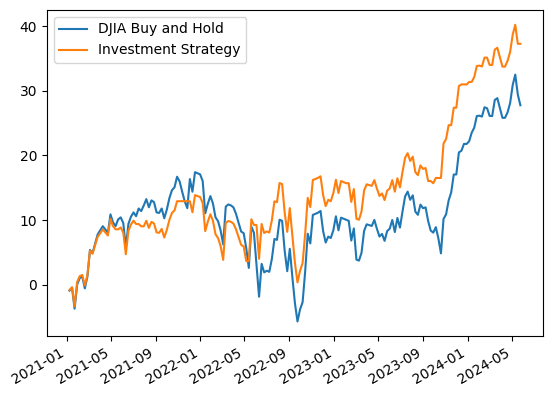



Classifier: Naive Bayes
Accuracy: 60.81871345029239%
Classification Report:
              precision    recall  f1-score   support

           A       0.30      0.39      0.34        23
           B       0.10      0.18      0.12        17
           C       0.84      0.70      0.76       131

    accuracy                           0.61       171
   macro avg       0.41      0.42      0.41       171
weighted avg       0.69      0.61      0.64       171

    A   B   C
A   9   4  10
B   6   3   8
C  15  24  92
DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 5.81%, Volatility: 12.07%, Sharpe Ratio: 0.48


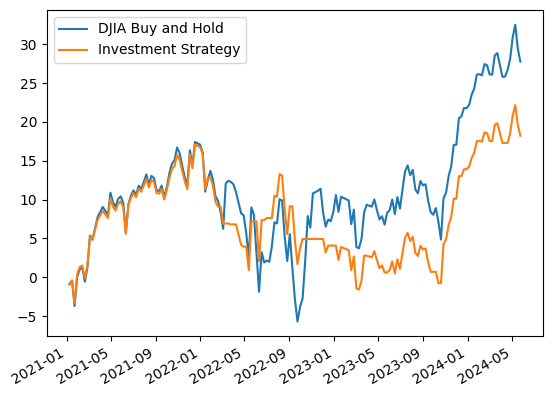



Classifier: Gradient Boosting
Accuracy: 49.122807017543856%
Classification Report:
              precision    recall  f1-score   support

           A       0.27      0.17      0.21        23
           B       0.16      0.71      0.26        17
           C       0.85      0.52      0.64       131

    accuracy                           0.49       171
   macro avg       0.42      0.47      0.37       171
weighted avg       0.70      0.49      0.55       171

   A   B   C
A  4  10   9
B  2  12   3
C  9  54  68


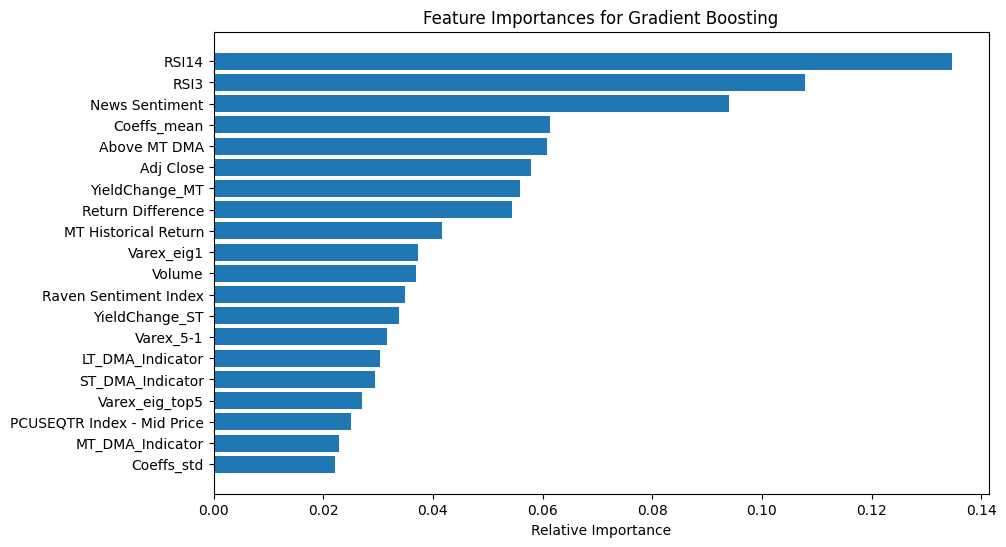

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.72%, Volatility: 9.31%, Sharpe Ratio: 0.94


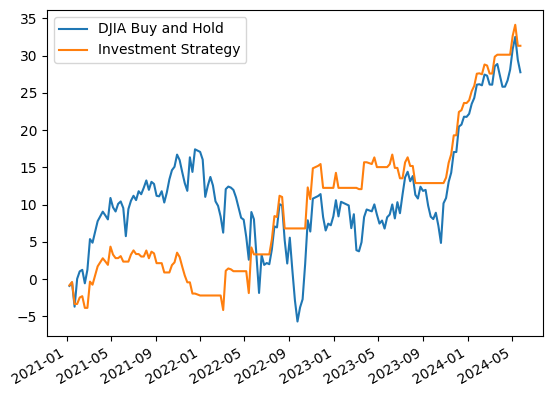



Classifier: XGBoost
Accuracy: 66.66666666666666%
Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.13      0.17        23
           B       0.12      0.18      0.14        17
           C       0.82      0.82      0.82       131

    accuracy                           0.67       171
   macro avg       0.39      0.38      0.38       171
weighted avg       0.67      0.67      0.67       171

   A   B    C
A  3   5   15
B  5   3    9
C  5  18  108


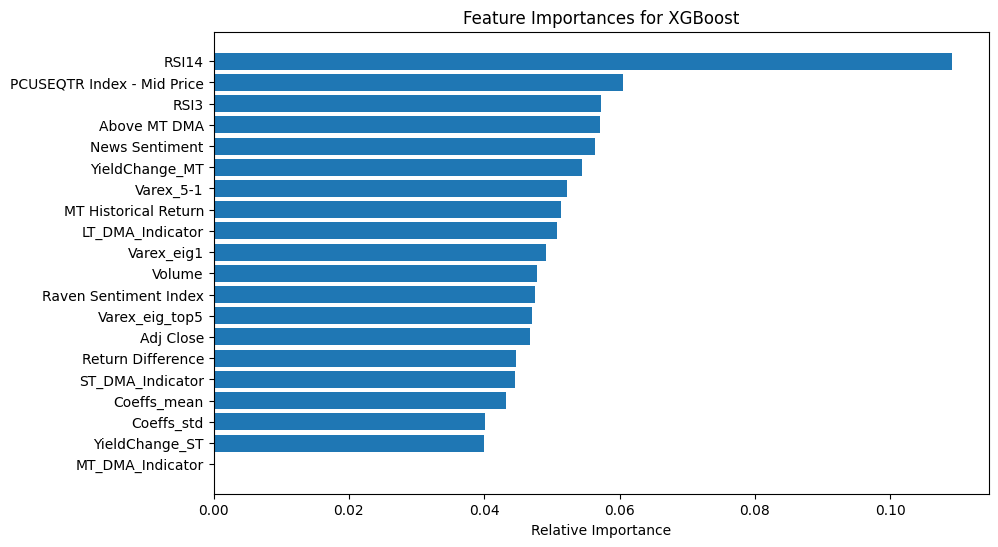

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 5.49%, Volatility: 12.06%, Sharpe Ratio: 0.46


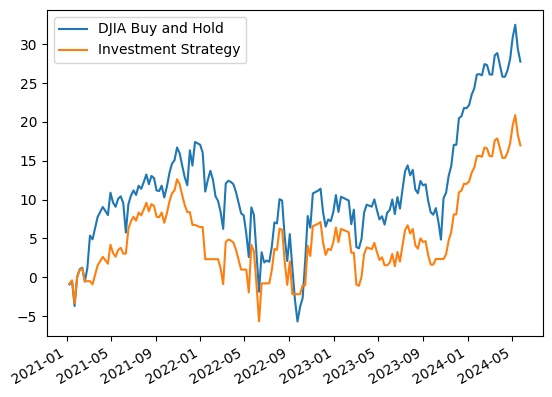



Classifier: CatBoost
Accuracy: 72.51461988304094%
Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.22      0.24        23
           B       0.14      0.06      0.08        17
           C       0.81      0.90      0.86       131

    accuracy                           0.73       171
   macro avg       0.41      0.39      0.39       171
weighted avg       0.67      0.73      0.70       171

   A  B    C
A  5  1   17
B  6  1   10
C  8  5  118


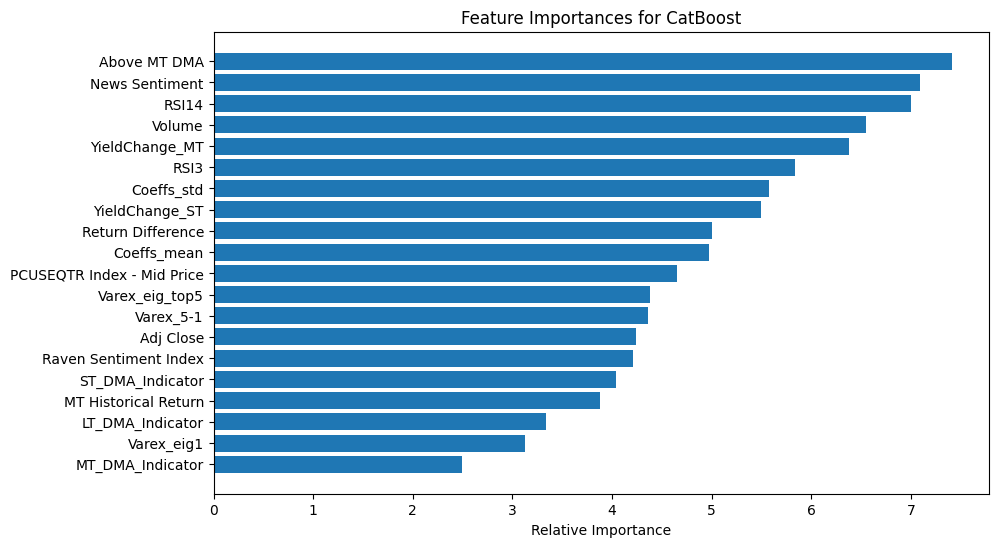

DJIA - Annualized Return: 8.52%, Volatility: 14.70%, Sharpe Ratio: 0.58
Investment Strategy - Annualized Return: 8.16%, Volatility: 13.28%, Sharpe Ratio: 0.61


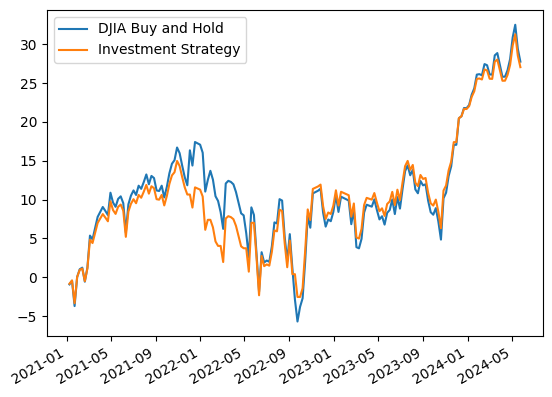

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Training data:
X_train = pd.DataFrame(train[x_cols])
y_train = pd.Series(train.Regime)

# Test data:
X_test = pd.DataFrame(test[x_cols])
y_test = pd.Series(test.Regime)

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define classifiers including advanced models
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'Light GBM': LGBMClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=1, random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, 1, 1], random_state=42, verbose=0)  # Adjust class_weights as necessary
}

models_without_importance = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Naive Bayes"]

# Create pipelines and evaluate
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    accuracy = accuracy_score(y_test, y_pred_labels)

    confusion_matrix_model = pd.DataFrame(confusion_matrix(y_test, y_pred_labels))
    confusion_matrix_model.index = ['A','B','C']
    confusion_matrix_model.columns = ['A','B','C']

    if name not in models_without_importance and hasattr(clf, 'feature_importances_'):
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred_labels),
            'feature_importance': clf.feature_importances_,
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred_labels
        }
    else:
        results[name] = {
            'accuracy': str(accuracy * 100) + "%",
            'classification_report': classification_report(y_test, y_pred_labels),
            'confusion_matrix':confusion_matrix_model,
            'predicted_y':y_pred_labels
        }

# Plot feature importances
def plot_feature_importance(importances, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [x_cols[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

#plot Returns:
def plot_returns(final_df,X_test,y_test,y_pred_labels):
    return_df = pd.DataFrame(final_df['Next_5_Day_Return'].loc[X_test.index])

    return_df['Regime'] = y_test

    return_df['Position'] = 0
    return_df.loc[(return_df[return_df['Regime'] == 'C'] == True).index,'Position'] = 0.9
    return_df.loc[(return_df[return_df['Regime'] == 'A'] == True).index,'Position'] = 1



    return_df['Portfolio_Return'] = return_df['Position']*return_df['Next_5_Day_Return']

    return_df['DJIA Buy and Hold Portfolio'] =  ((1 + return_df['Portfolio_Return']).cumprod() - 1)*100
    return_df['DJIA Buy and Hold'] =  ((1 + return_df['Next_5_Day_Return']).cumprod() - 1)*100


    return_df['Predicted Regime'] = y_pred_labels
    return_df['Predicted Position'] = 0
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'C'] == True).index,'Predicted Position'] = 0.9
    return_df.loc[(return_df[return_df['Predicted Regime'] == 'A'] == True).index,'Predicted Position'] = 1

    return_df['Predicted Portfolio_Return'] = return_df['Predicted Position']*return_df['Next_5_Day_Return']
    return_df['Investment Strategy'] =  ((1 + return_df['Predicted Portfolio_Return']).cumprod() - 1)*100

    annualized_return, volatility, sharpe_ratio = calculate_performance_metrics(return_df['Next_5_Day_Return'])
    predicted_annualized_return, predicted_volatility, predicted_sharpe_ratio = calculate_performance_metrics(return_df['Predicted Portfolio_Return'])

    print(f"DJIA - Annualized Return: {annualized_return:.2%}, Volatility: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Investment Strategy - Annualized Return: {predicted_annualized_return:.2%}, Volatility: {predicted_volatility:.2%}, Sharpe Ratio: {predicted_sharpe_ratio:.2f}")


    return_df[['DJIA Buy and Hold','Investment Strategy']].plot()

    plt.show()

# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print(result['confusion_matrix'])
    if 'feature_importance' in result:
        plot_feature_importance(result['feature_importance'], name)
    plot_returns(final_df,X_test,y_test,result['predicted_y'])

    print("\n" + "="*80 + "\n")
